In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [12]:
df = pd.read_csv('insurance.csv')
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]

In [13]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year'], float64: ['policy_annual_premium', '_c39'], object: ['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']}

# Statistical Analysis

**Since dataset is large, Let check for any entry which is repeated or duplicated in dataset.**

In [14]:
df.duplicated('policy_number').sum()

0

In [15]:
df.isin([' ','NA', '-']).sum().any()

False

In [16]:
df.isin(['?']).sum().any()

True

In [17]:
df = df.replace('?', np.NaN)

# Missing value check

In [18]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                             Missing Values  % Missing data
_c39                                   1000           100.0
property_damage                         360            36.0
police_report_available                 343            34.3
collision_type                          178            17.8
authorities_contacted                    91             9.1
bodily_injuries                           0             0.0
incident_state                            0             0.0
incident_city                             0             0.0
incident_location                         0             0.0
incident_hour_of_the_day                  0             0.0
number_of_vehicles_involved               0             0.0
fraud_reported                            0             0.0
auto_year                                 0             0.0
auto_model                                0             0.0
total_claim_amount                        0             0.0
injury_claim                            

**Comment:**
- 'property_damage','police_report_available','collision_type','authorities_contacted' contain missing values.
- _c39 columns with 100 % null value. We gone drop it.
- Other missing value feature are categorical in nature. We gone impute them with mode of that particular category.

**Missing value imputation**

In [19]:
df['property_damage'].fillna(df['property_damage'].mode()[0],inplace=True)
df['police_report_available'].fillna(df['police_report_available'].mode()[0],inplace=True)
df['collision_type'].fillna(df['collision_type'].mode()[0],inplace=True)
df['authorities_contacted'].fillna(df['authorities_contacted'].mode()[0], inplace=True)

In [20]:
# Droping unnecessary columns
df.drop(['_c39','incident_location','insured_zip','policy_number'],axis=1,inplace=True)

**Missing value check after imputation**

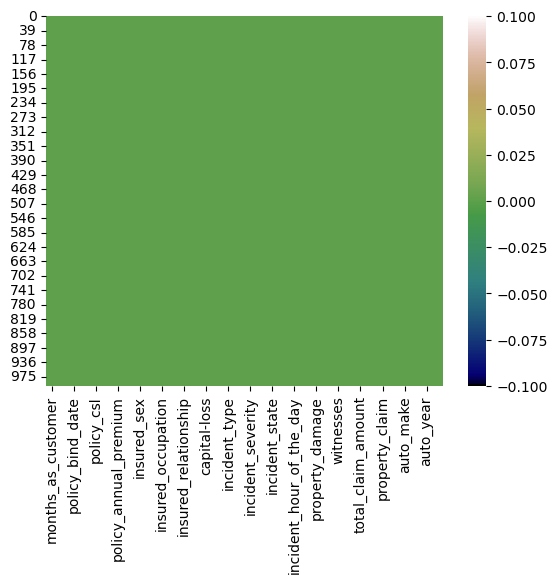

In [21]:
# Heatmap of missing value
sns.heatmap(df.isnull(),cmap="gist_earth")
plt.show()

**Finally, No Missing Value is Present.**

We are Now Yes To Go Further !!!

**Something details on Policy_csl column :**
- Combined single limit (CSL): CSL is a single number that describes the predetermined limit for the combined total of the Bodily Injury Liability coverage and Property Damage Liability coverage per occurrence or accident.
- In this dataset Policy_csl columns have numerical data separated by '/', resulting into object datatype.
- We will split this column into two CSL columns for person and accident.

In [22]:
# Spliting and extracting policy_csl at '/'
df['CSL_Personal']=df.policy_csl.str.split('/',expand=True)[0]
df['CSL_Accidental']=df.policy_csl.str.split('/',expand=True)[1]

In [23]:
# Now we can drop policy_csl column
df.drop("policy_csl", axis=1, inplace=True)

**We have two features here with datetime datatypes. We gone split them in terms of date, month and year.**

In [24]:
# Converting Date columns from object type into datetime data type
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['incident_date']=pd.to_datetime(df['incident_date'])

In [25]:
# Extracting Day, Month and Year column from policy_bind_date
df['policy_bind_day'] = df['policy_bind_date'].dt.day
df['policy_bind_month'] = df['policy_bind_date'].dt.month
df['policy_bind_year'] = df['policy_bind_date'].dt.year

# Extracting Day, Month and Year column from incident_date
df['incident_day'] = df['incident_date'].dt.day
df['incident_month'] = df['incident_date'].dt.month
df['incident_year'] = df['incident_date'].dt.year

In [26]:
# Since Extraction is done now we can Drop policy_bind_date and incident_date columns
df.drop(['policy_bind_date','incident_date'],axis=1,inplace=True)

In [27]:
# Incident year for all data is 2015 so we gone drop it.
df.drop(['incident_year'],axis=1,inplace=True)

- We have one column name as 'auto_year' which depict year from which Automobile in operational on road. In simple word Automobile age. Here we will do some simple feature engineering to create new columns with automobile age and drop eariler.

- As incident year is 2015, we will use 2015 as base year for new ccolumn creation.

In [28]:
# Lets extract age of the vehicle from auto_year by subtracting it from the year 2018
df['Automobile_Age']=2015 - df['auto_year']
# Droping auto year column
df.drop("auto_year",axis=1,inplace=True)

**Spliting feature in categorical and numerical variable**

In [29]:
Category = ['policy_state',  'insured_sex', 'insured_education_level', 'insured_occupation', 
            'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
            'authorities_contacted','incident_state', 'incident_city', 'property_damage','police_report_available',
            'auto_make','auto_model', 'fraud_reported']
    
Numerical = ['months_as_customer','CSL_Personal','CSL_Accidental', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 
             'total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim', 'Automobile_Age','policy_annual_premium']

In [30]:
df.columns.to_series().groupby(df.dtypes).groups

{int32: ['policy_bind_day', 'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month'], int64: ['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'Automobile_Age'], float64: ['policy_annual_premium'], object: ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported', 'CSL_Personal', 'CSL_Accidental']}

**Statistical Matrix**

In [31]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

In [33]:
df[Category].describe().T.style.background_gradient(cmap='summer_r')

**Start with Enlisting Value counts & Sub-categories of different categorial features available**

In [34]:
for i in Category:
    print(i)
    print(df[i].value_counts())
    print("="*100)

policy_state
policy_state
OH    352
IL    338
IN    310
Name: count, dtype: int64
insured_sex
insured_sex
FEMALE    537
MALE      463
Name: count, dtype: int64
insured_education_level
insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: count, dtype: int64
insured_occupation
insured_occupation
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: count, dtype: int64
insured_hobbies
insured_hobbies
reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking      

**Start exploring Target variable**

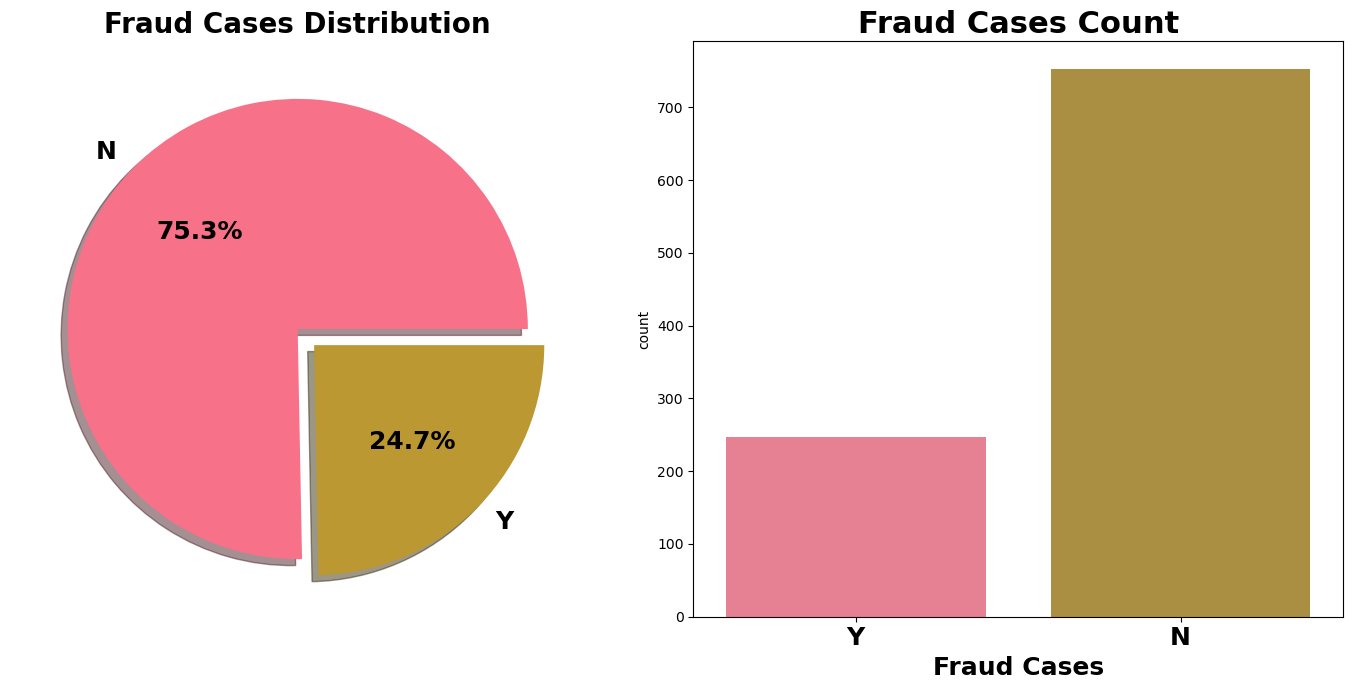

In [36]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(14,7))
df['fraud_reported'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('Fraud Cases Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='fraud_reported',data=df,ax=ax[1])
ax[1].set_title('Fraud Cases Count',fontsize=22,fontweight ='bold')
ax[1].set_xlabel("Fraud Cases",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()

**Observation:**
- Outof all cases around 24.7% cases are Fraud.
- 'fraud-reported is our target variable to be predicted. From count plot we can say dataset is imbalanced in nature.

**Start Exploring target variable against Independent features to gain more insight.**

# Analysing Age vs Fraud

In [37]:
print('Minimum Age :',df.age.min(),'Years')
print('Maximum Age :',df.age.max(),'Years')
print('Average Age :',df.age.mean(),'Years')

Minimum Age : 19 Years
Maximum Age : 64 Years
Average Age : 38.948 Years


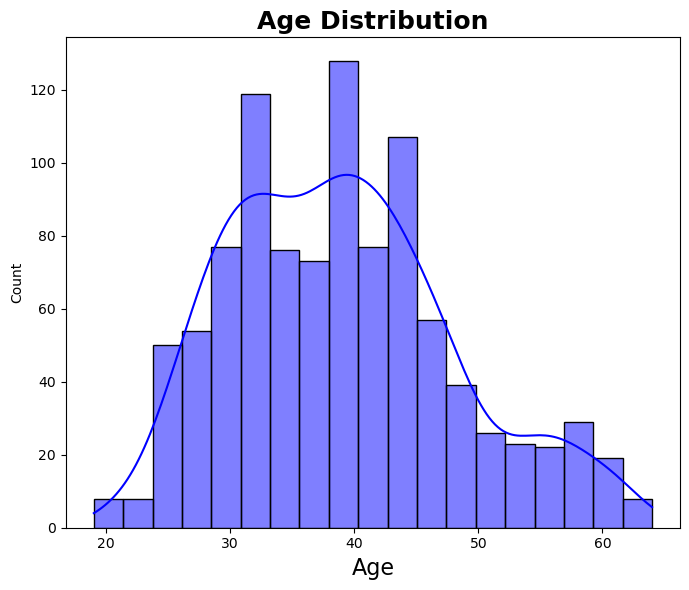

In [38]:
plt.figure(figsize=(7,6))
sns.histplot(df.age, kde=True, color='b')
plt.xlabel('Age',fontsize=16)
plt.title('Age Distribution', fontsize=18,fontweight ='bold')
plt.show()

In [39]:
# Spliting age in different age range
df['age_bins'] = pd.cut(df.age, bins = [0, 10, 20, 30, 40, 50, 60, 70], 
                          include_lowest = True, labels = ['0-10','11-20','21-30','31-40', '41-50', '51-60', '61-70'])

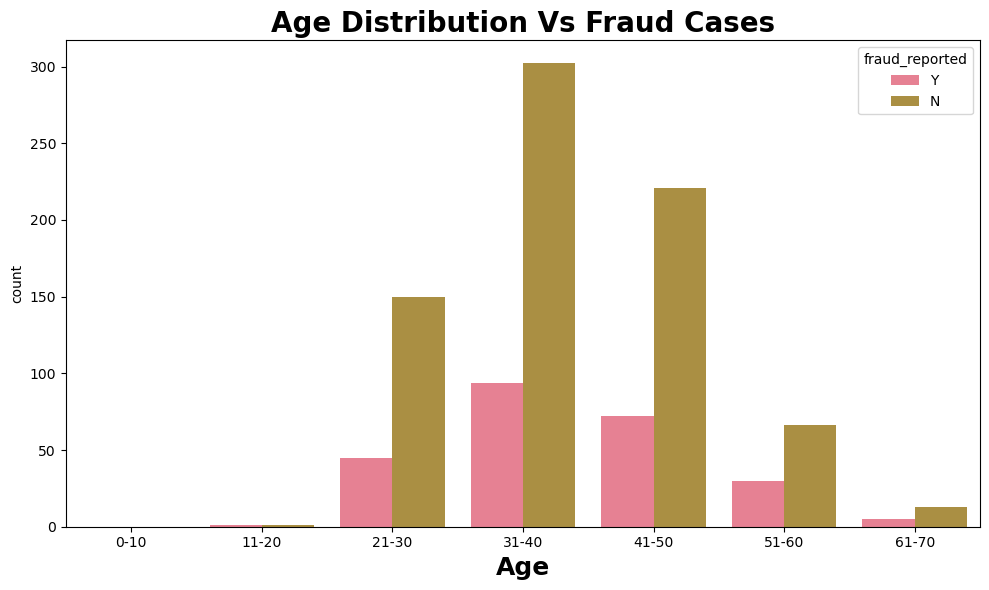

In [40]:
plt.figure(figsize=(10,6))
sns.countplot(x=df.age_bins, hue=df.fraud_reported)
plt.xlabel('Age',fontsize=18,fontweight ='bold')
plt.title('Age Distribution Vs Fraud Cases', fontsize=20,fontweight ='bold')
plt.show()

- Maximum fraud cases comes from people with age group of 31-50 year.
- Very few cases in 60+ year old peoples.

**Policy State Vs Fraud cases**

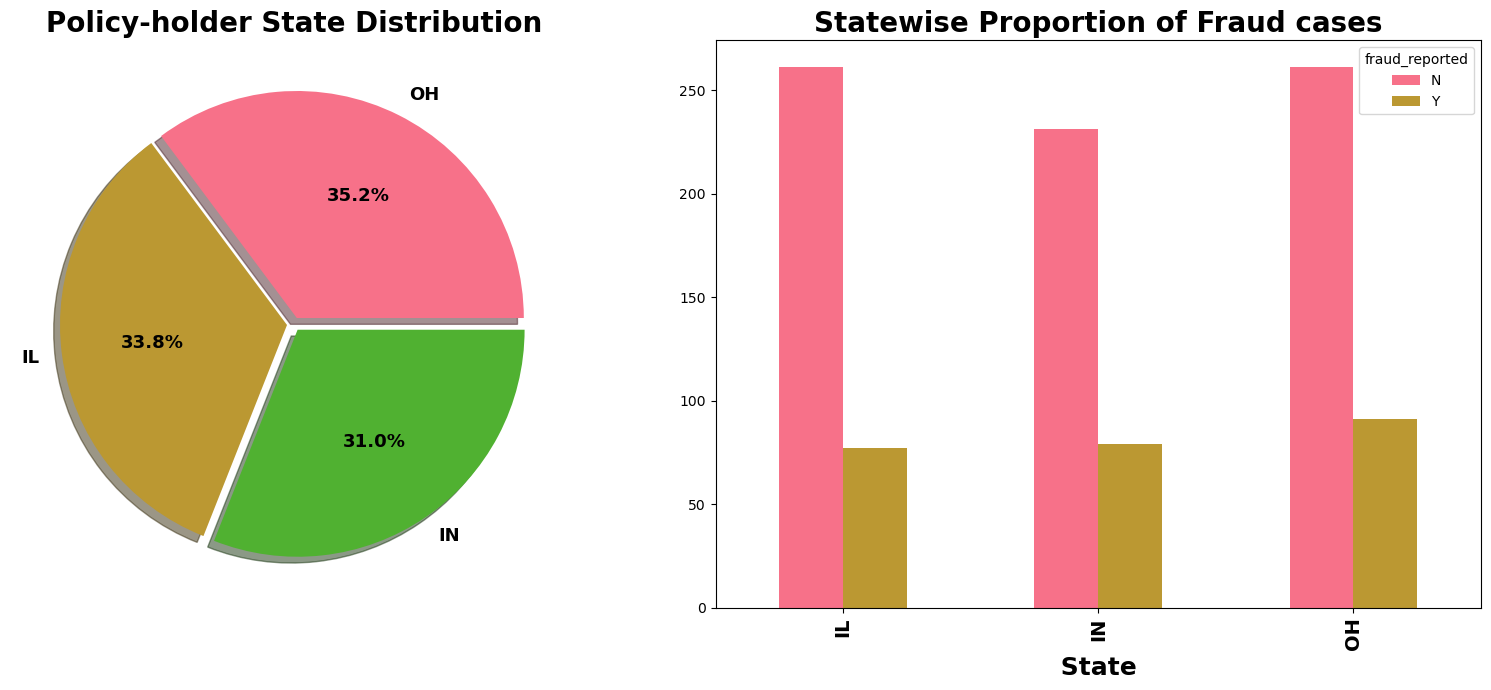

In [41]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['policy_state'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Policy-holder State Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(df['policy_state'], df['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Statewise Proportion of Fraud cases',fontsize=20,fontweight ='bold')
ax[1].set_xlabel(" State ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

- Almost same amount of cases come from each state.
- Maximum fraud cases come from state of Ohio.

**Insured Gender Vs Fraud cases**

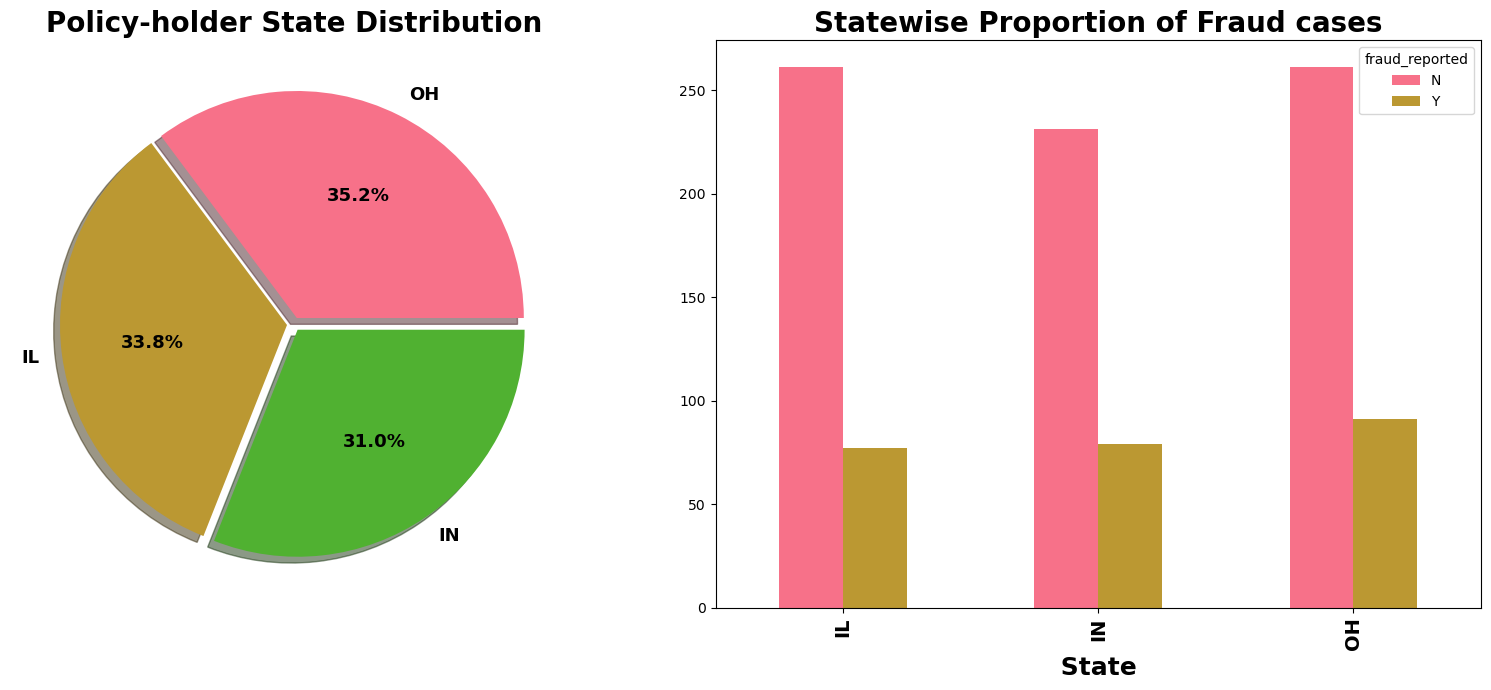

In [42]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['policy_state'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Policy-holder State Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(df['policy_state'], df['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Statewise Proportion of Fraud cases',fontsize=20,fontweight ='bold')
ax[1].set_xlabel(" State ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

**Comment:**
- Number of claims come from female is higher than which reported by male insured.
- Almost same amount of fraud cases comes from same gender.

**Education_level Vs Fraud cases**

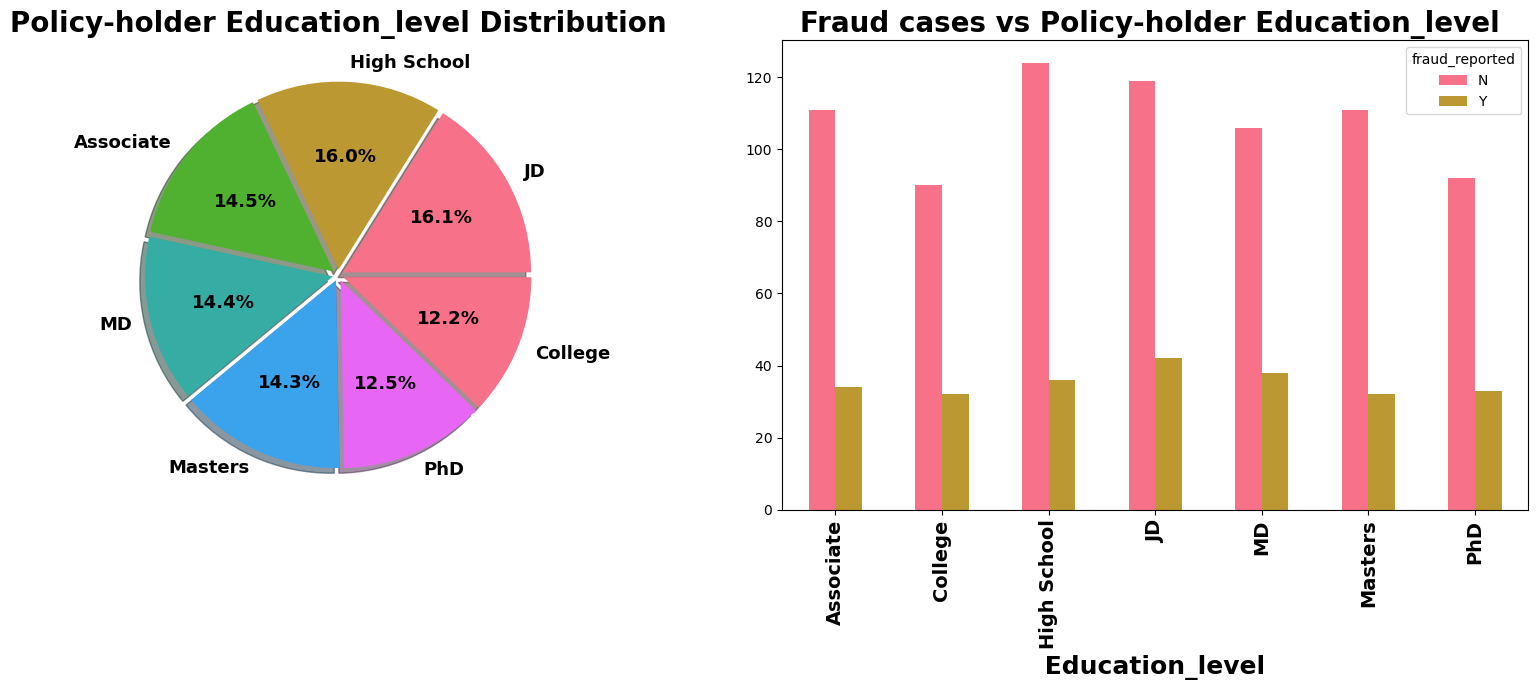

In [43]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['insured_education_level'].value_counts().plot.pie(explode=[0.03,0.03,0.03,0.03,0.03,0.03,.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Policy-holder Education_level Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(df['insured_education_level'], df['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Fraud cases vs Policy-holder Education_level ',fontsize=20,fontweight ='bold')
ax[1].set_xlabel(" Education_level ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

- We can see tendency to make fraud claims has across every education background, even in Masters, PhD. Education Level is not much important variable for us !!!

**Occupation of Insured Customers**

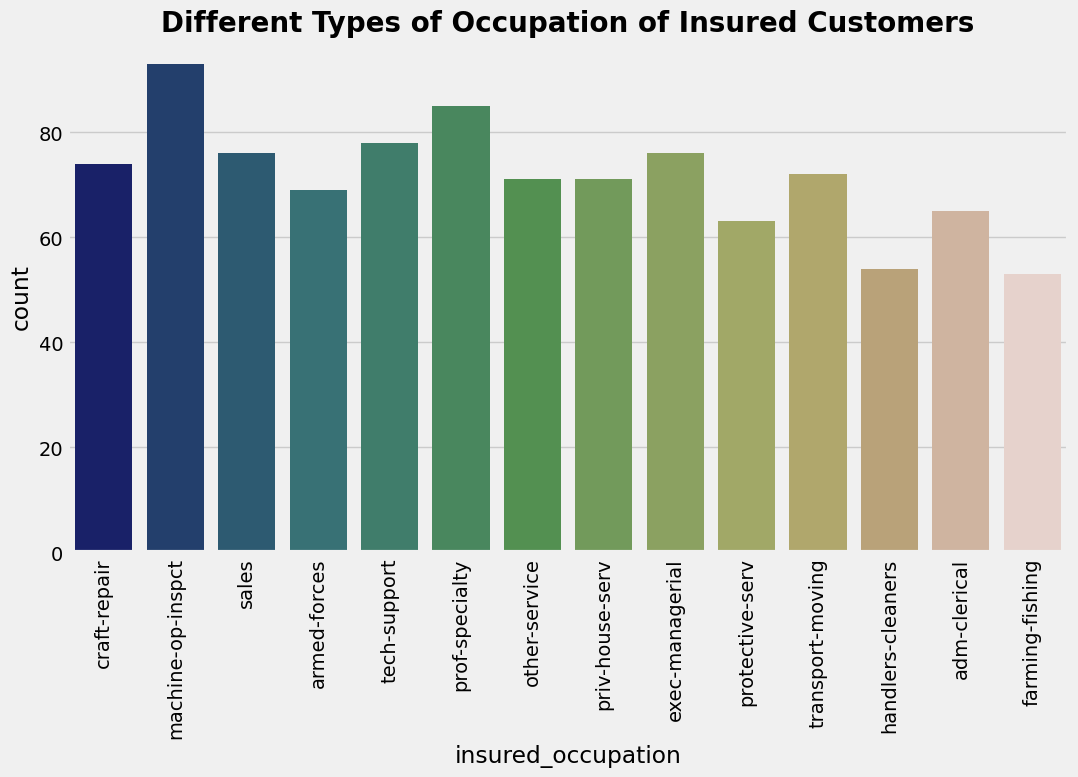

In [45]:
# let's check the insured occupation
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (11, 8)
sns.countplot(x=df['insured_occupation'], palette = 'gist_earth')
plt.title('Different Types of Occupation of Insured Customers' ,fontsize=20,fontweight ='bold')
plt.xticks(rotation = 90)
plt.show()

**Hobbies of Insured Customers**

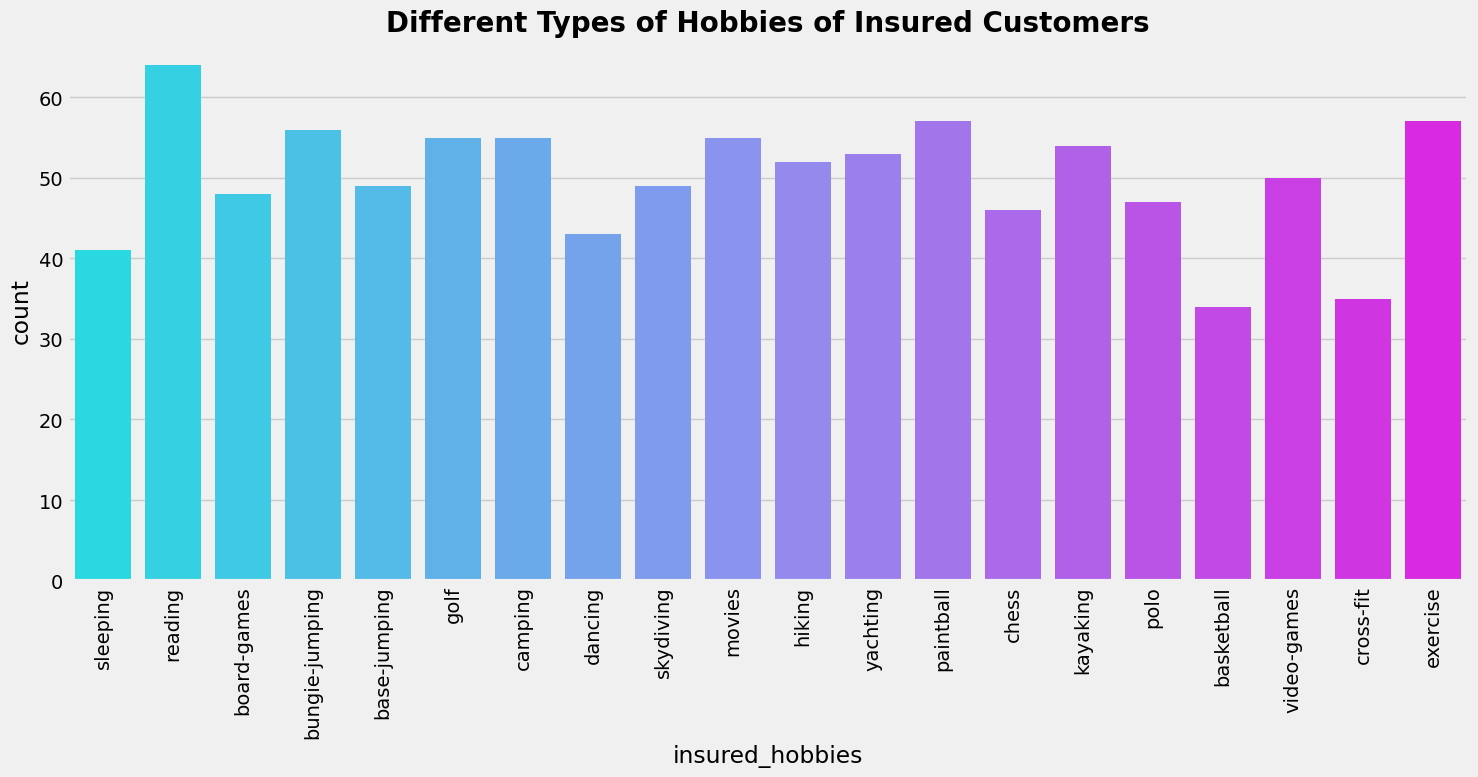

In [47]:
# let's check the insured hobbies
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(x= df['insured_hobbies'], palette = 'cool')
plt.title('Different Types of Hobbies of Insured Customers',fontsize=20,fontweight ='bold')
plt.xticks(rotation = 90)
plt.show() 

**Different Types Of Incidents Vs Fraud casees**

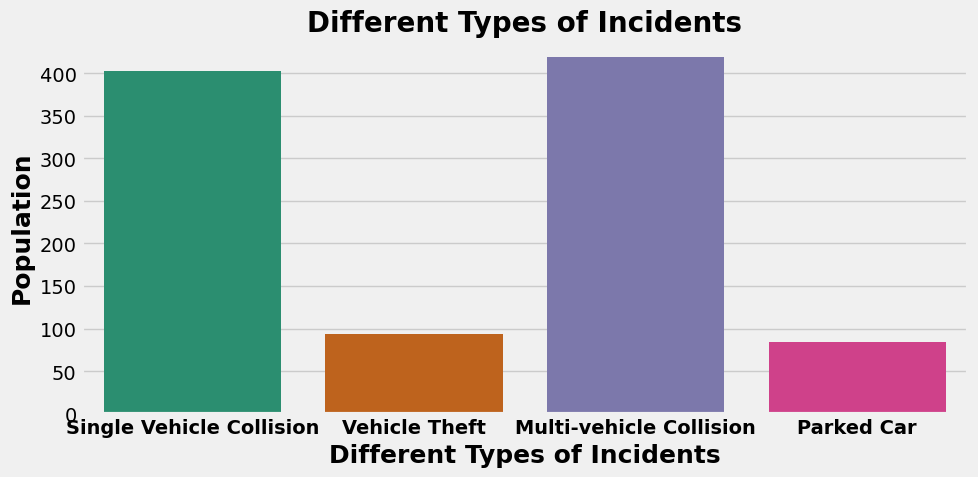

In [49]:
# let's check the incident types
plt.rcParams['figure.figsize'] = (10,5)
sns.countplot(x=df['incident_type'], palette = 'Dark2')
plt.title('Different Types of Incidents',fontsize=20,fontweight ='bold')
plt.xlabel('Different Types of Incidents', fontsize=18,fontweight='bold')
plt.ylabel('Population', fontsize=18,fontweight='bold')
plt.xticks(fontweight ='bold')
plt.show()

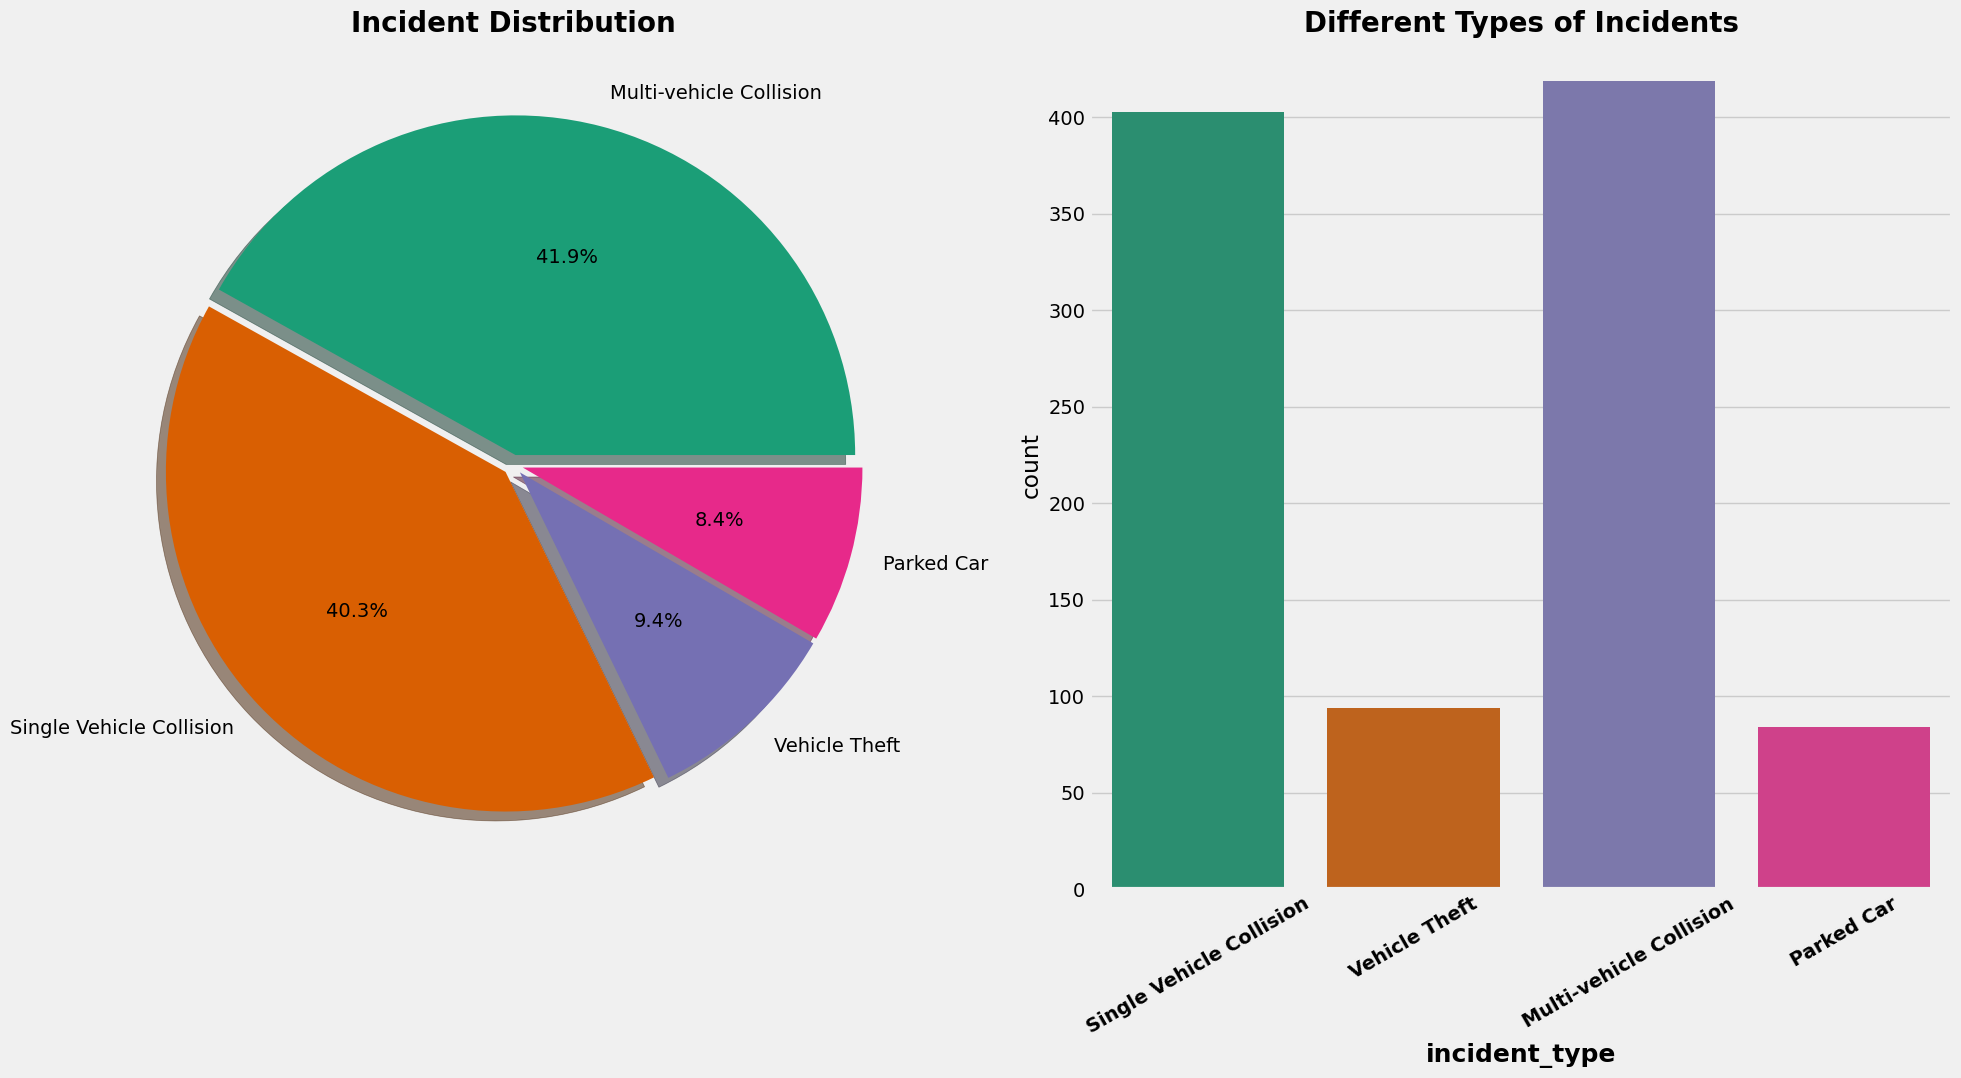

In [51]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Dark2')
f,ax=plt.subplots(1,2,figsize=(20,11))
df['incident_type'].value_counts().plot.pie(explode=[0.03,.03,.03,.03],autopct='%3.1f%%',
                                          textprops ={ 'fontsize':14}, ax=ax[0],shadow=True)
ax[0].set_title('Incident Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='incident_type',data=df,ax=ax[1])
ax[1].set_title('Different Types of Incidents',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("incident_type",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,rotation=30,fontweight ='bold')
plt.tight_layout()
plt.show()

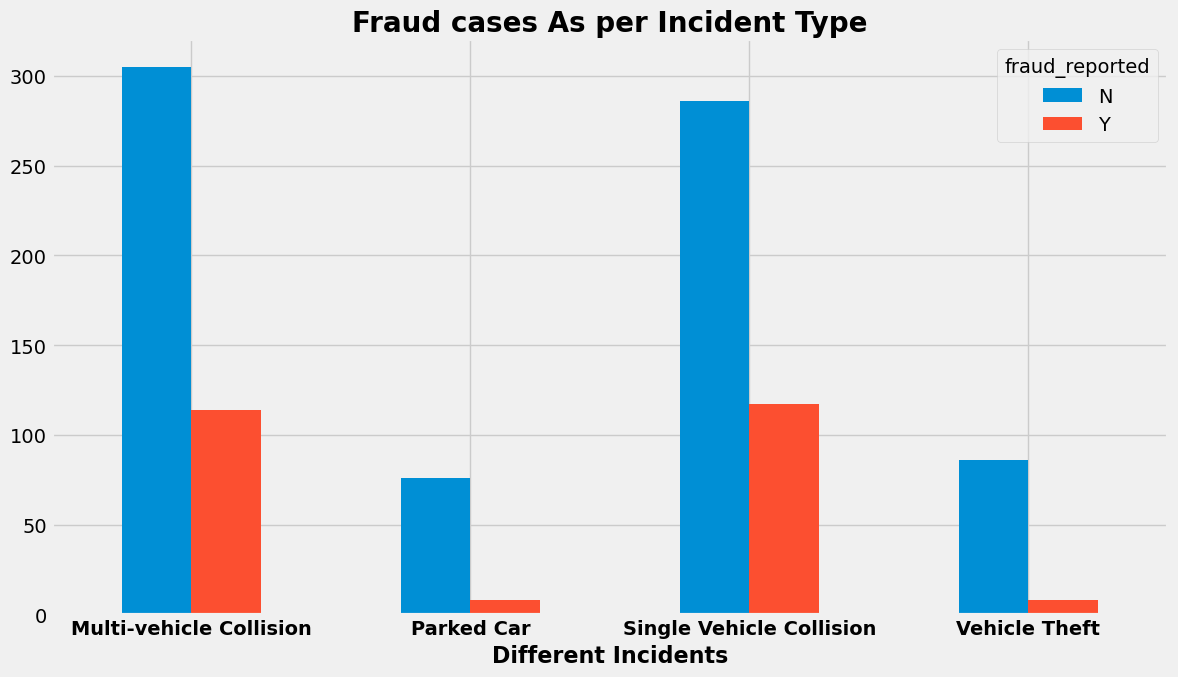

In [52]:
# let's check the insured hobbies
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,7)
table = pd.crosstab(df['incident_type'], df['fraud_reported'])
table.plot(kind = 'bar')
plt.title('Fraud cases As per Incident Type',fontsize=20,fontweight ='bold')
plt.xlabel('Different Incidents', fontsize=16,fontweight='bold')
plt.xticks(fontsize=14,rotation=0,fontweight ='bold')
plt.show()

**Observation:**
- Most of case comes from Multi-vehicle and single vehicle collision.
- Some claims are due to automobile robbery.
- One claim out of three claim is fraud in multi or single vehicle collision incident.

It will be interesting to figure out collision type and severity for different incident and corresponding fraud claim.

**Exploration of different Collision**

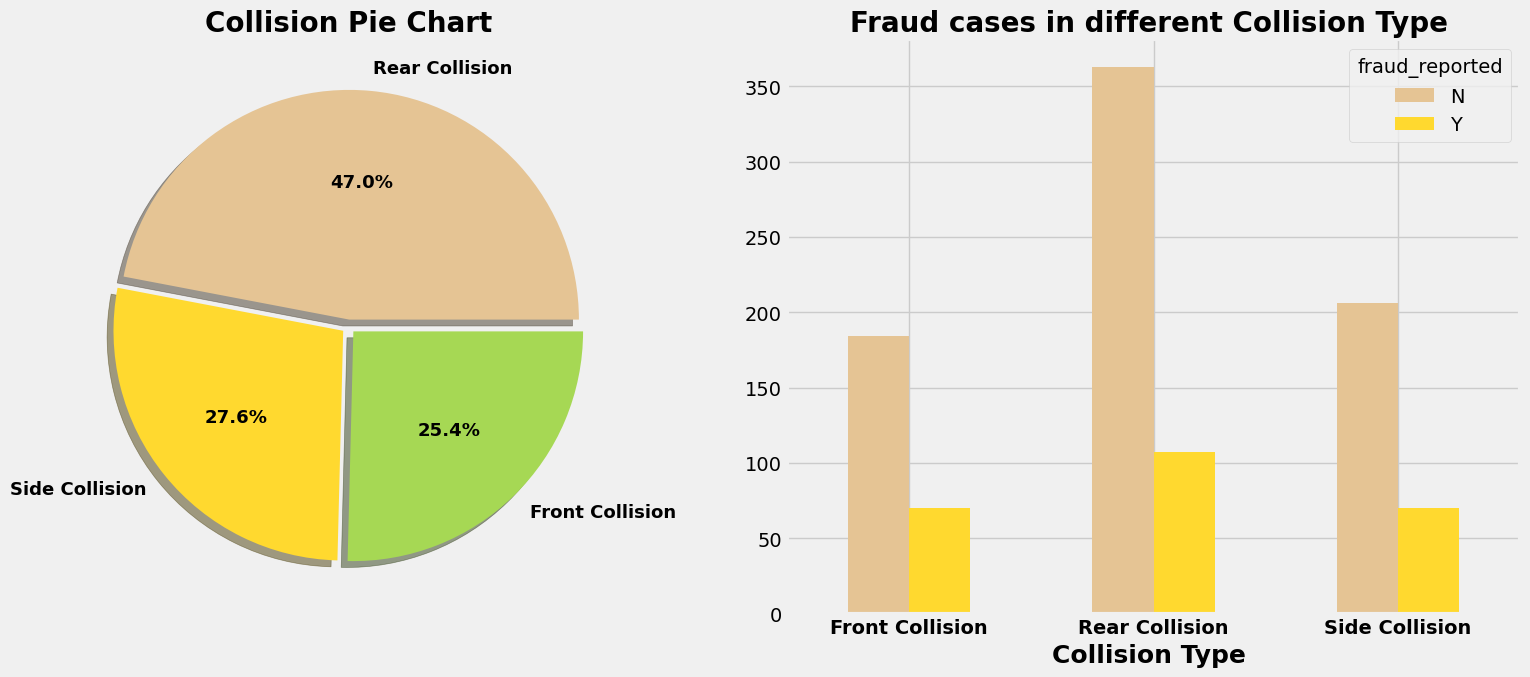

In [53]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set2_r')
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['collision_type'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Collision Pie Chart', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(df['collision_type'], df['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Fraud cases in different Collision Type ',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Collision Type ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold',rotation=0)
plt.tight_layout()
plt.show()

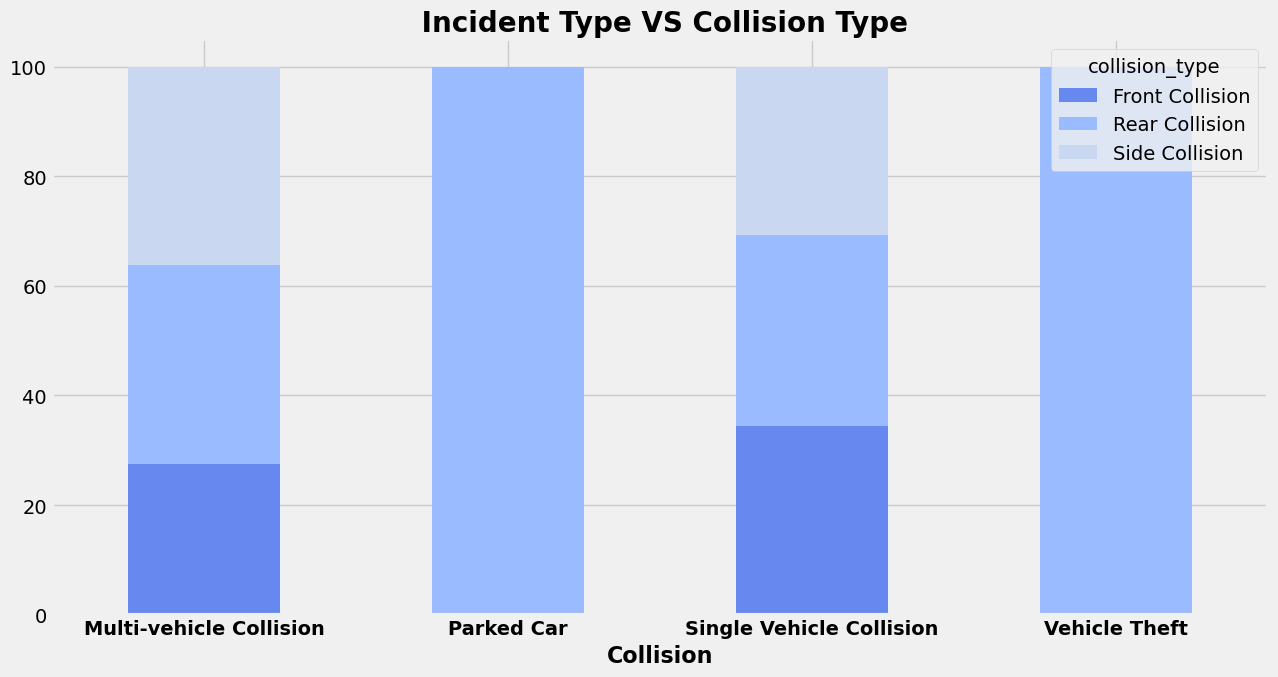

In [54]:
# let's check the insured hobbies
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13,7)
sns.set_palette('coolwarm')
table = pd.crosstab(df['incident_type'], df['collision_type'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True)
plt.title(' Incident Type VS Collision Type',fontsize=20,fontweight ='bold')
plt.xlabel('Collision', fontsize=16,fontweight='bold')
plt.xticks(fontsize=14,rotation=0,fontweight ='bold')
plt.show() 

**Collision Vs Incident Severity**

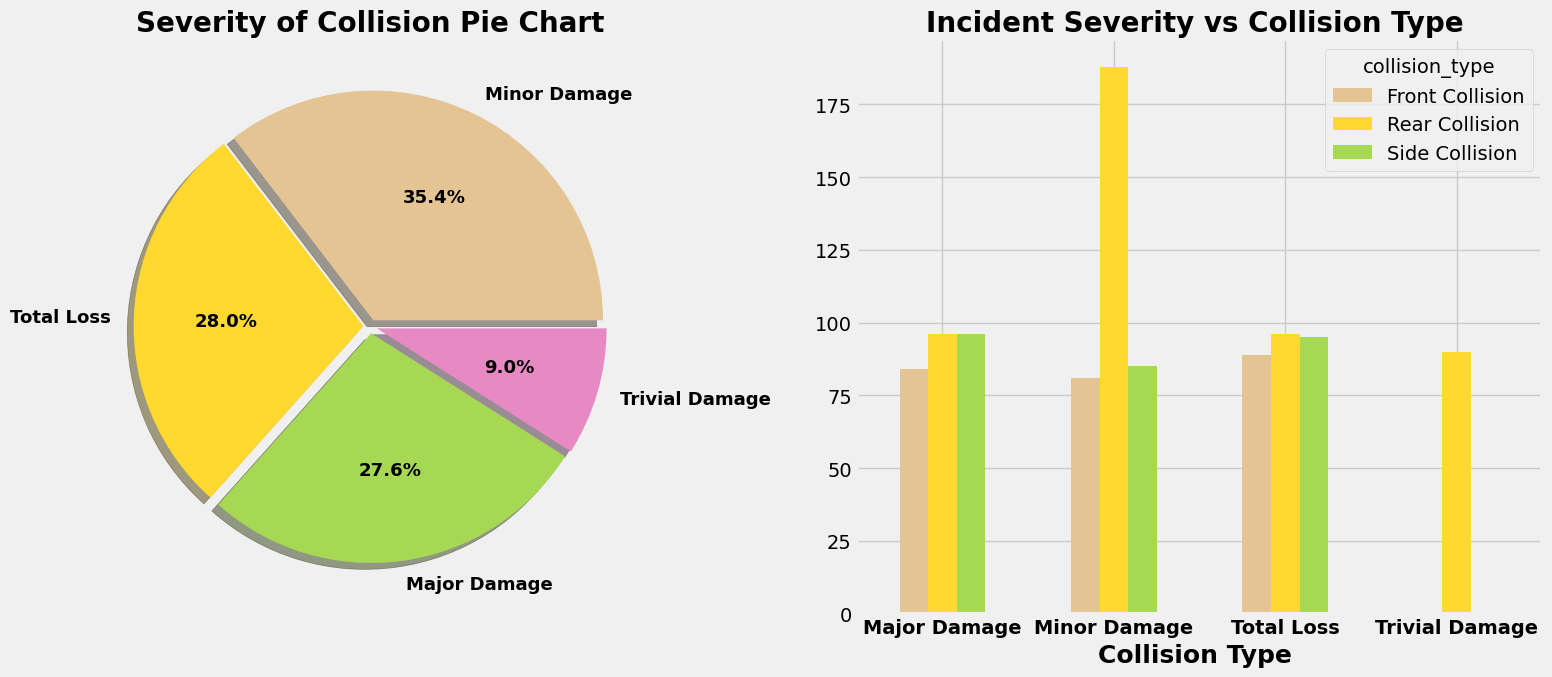

In [55]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set2_r')
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['incident_severity'].value_counts().plot.pie(explode=[0.03,0.03,0.03,.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Severity of Collision Pie Chart', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(df['incident_severity'], df['collision_type'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Incident Severity vs Collision Type ',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Collision Type ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold',rotation=0)
plt.tight_layout()
plt.show()

**Let check another plot of Incident Type Vs Severity of collision to gain more insight**

In [56]:
pd.crosstab(df['incident_type'], df['incident_severity']).style.background_gradient(cmap='summer_r')

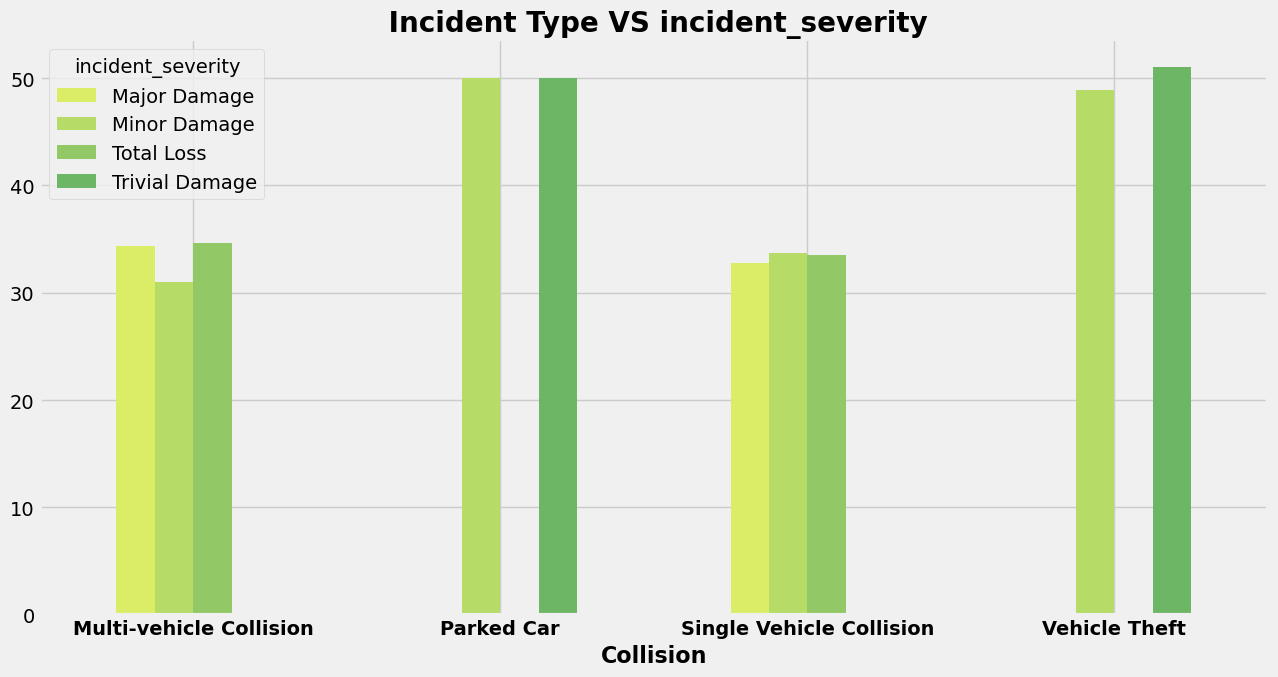

In [57]:
# let's check the insured hobbies
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13,7)
sns.set_palette('summer_r')
table = pd.crosstab(df['incident_type'], df['incident_severity'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar')
plt.title(' Incident Type VS incident_severity',fontsize=20,fontweight ='bold')
plt.xlabel('Collision', fontsize=16,fontweight='bold')
plt.xticks(fontsize=14,rotation=0,fontweight ='bold')
plt.show() 

- It seem like incident Type is important variable for us. Now is time to dive deep to get more insight on incident type by visualise incident type with Numerical features.

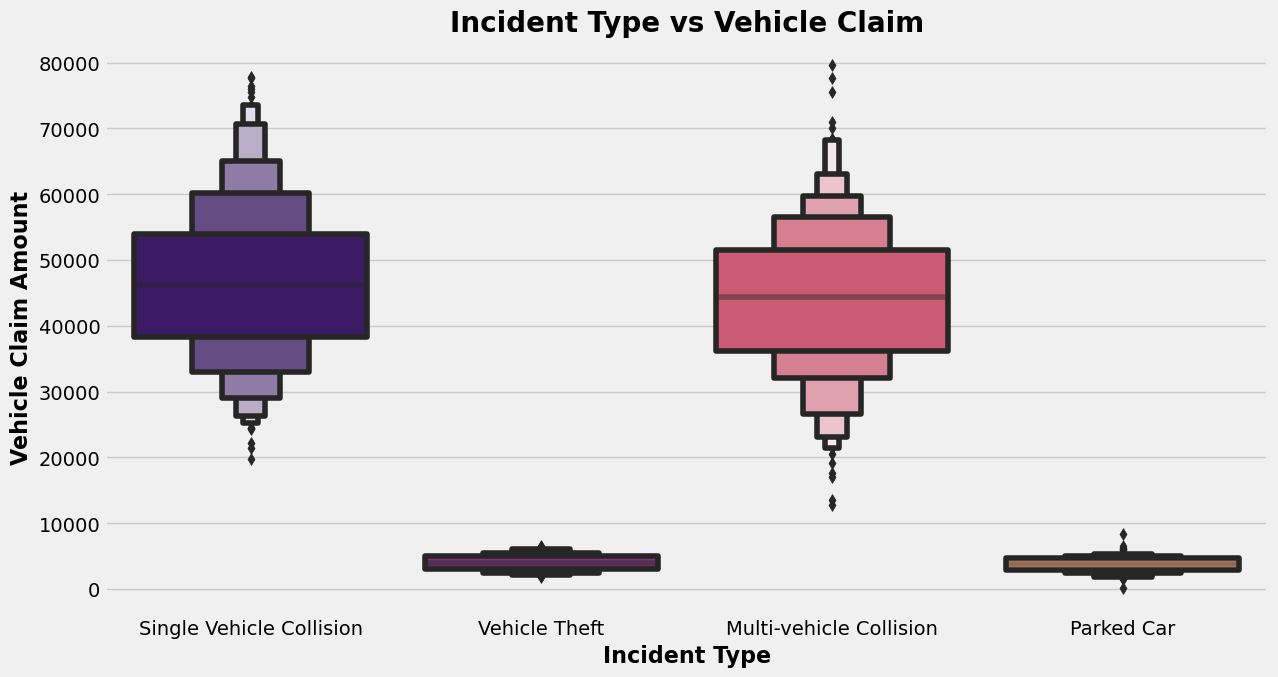

In [60]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13,7)
sns.boxenplot(x=df['incident_type'], y=df['vehicle_claim'], palette = 'magma')
plt.title('Incident Type vs Vehicle Claim',fontsize=20,fontweight ='bold')
plt.xlabel('Incident Type', fontsize=16,fontweight='bold')
plt.ylabel('Vehicle Claim Amount', fontsize=16,fontweight='bold')
plt.show()

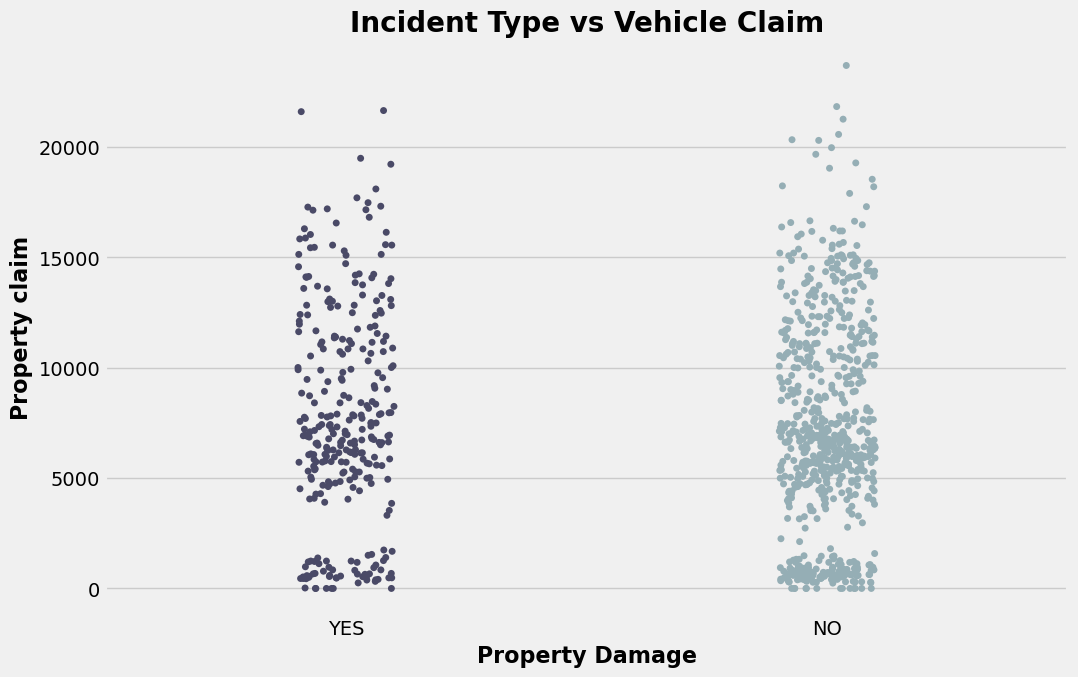

In [61]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (11,7)
sns.stripplot(x=df['property_damage'], y= df['property_claim'], palette = 'bone')
plt.title('Incident Type vs Vehicle Claim',fontsize=20,fontweight ='bold')
plt.xlabel('Property Damage', fontsize=16,fontweight='bold')
plt.ylabel('Property claim', fontsize=16,fontweight='bold')
plt.show()

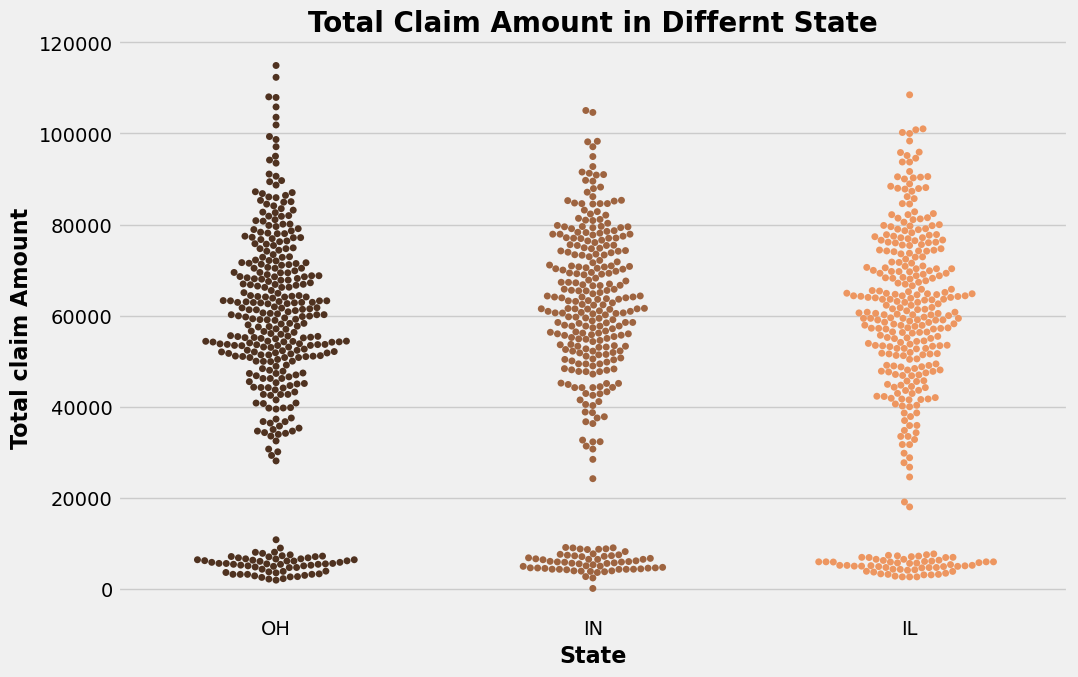

In [62]:
# swarm plot
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (11,7)
sns.swarmplot(x=df['policy_state'], y=df['total_claim_amount'], palette = 'copper')
plt.title('Total Claim Amount in Differnt State',fontsize=20,fontweight ='bold')
plt.xlabel('State', fontsize=16,fontweight='bold')
plt.ylabel('Total claim Amount', fontsize=16,fontweight='bold')
plt.show()

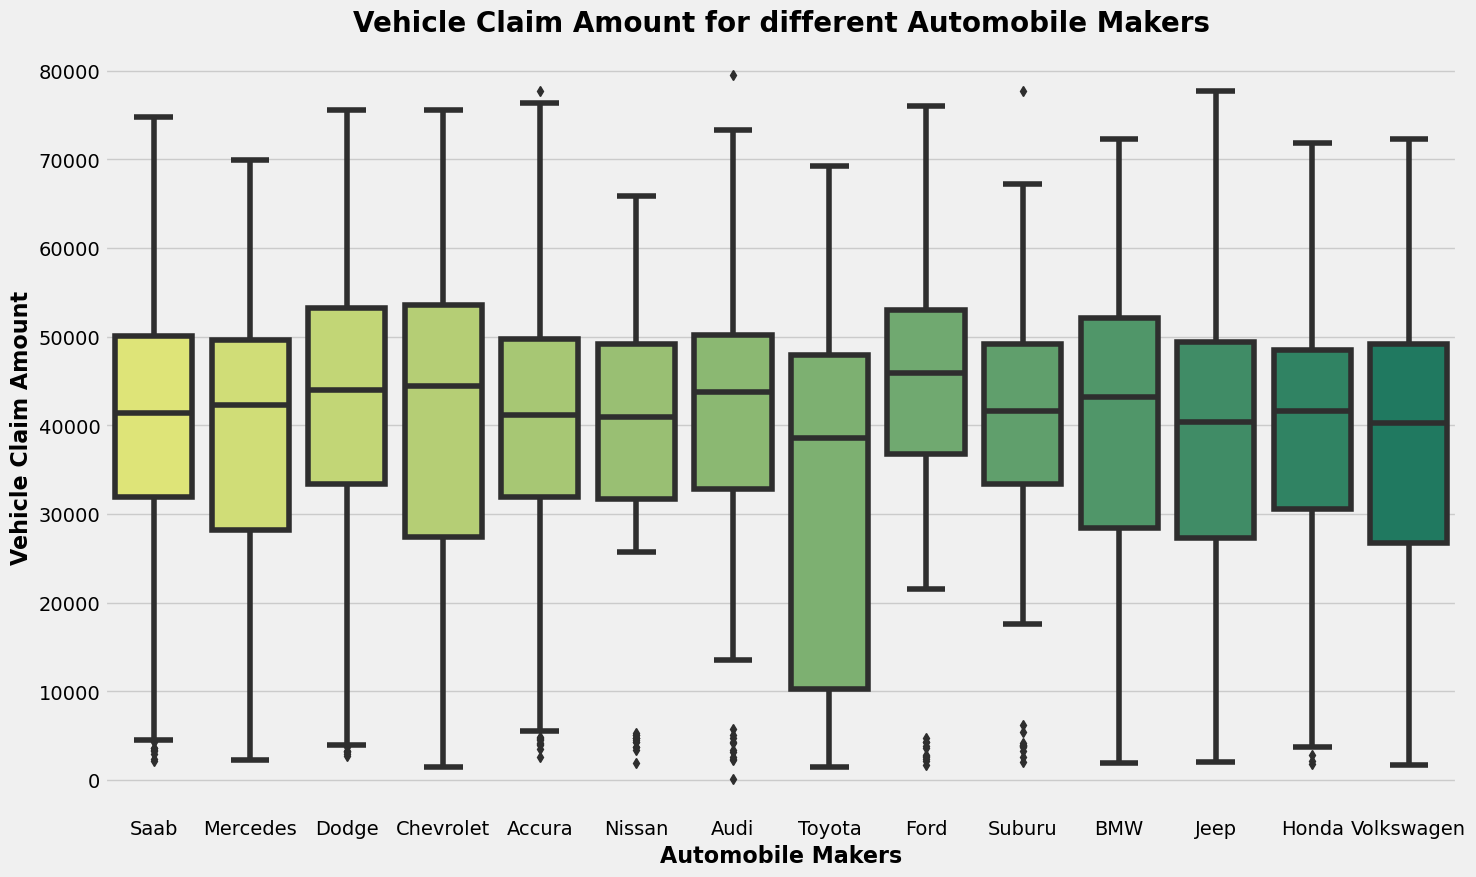

In [64]:
# swarm plot
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,9)
sns.boxplot(x=df['auto_make'], y=df['vehicle_claim'], palette = 'summer_r')
plt.title('Vehicle Claim Amount for different Automobile Makers',fontsize=20,fontweight ='bold')
plt.xlabel('Automobile Makers', fontsize=16,fontweight='bold')
plt.ylabel('Vehicle Claim Amount', fontsize=16,fontweight='bold')
plt.show()

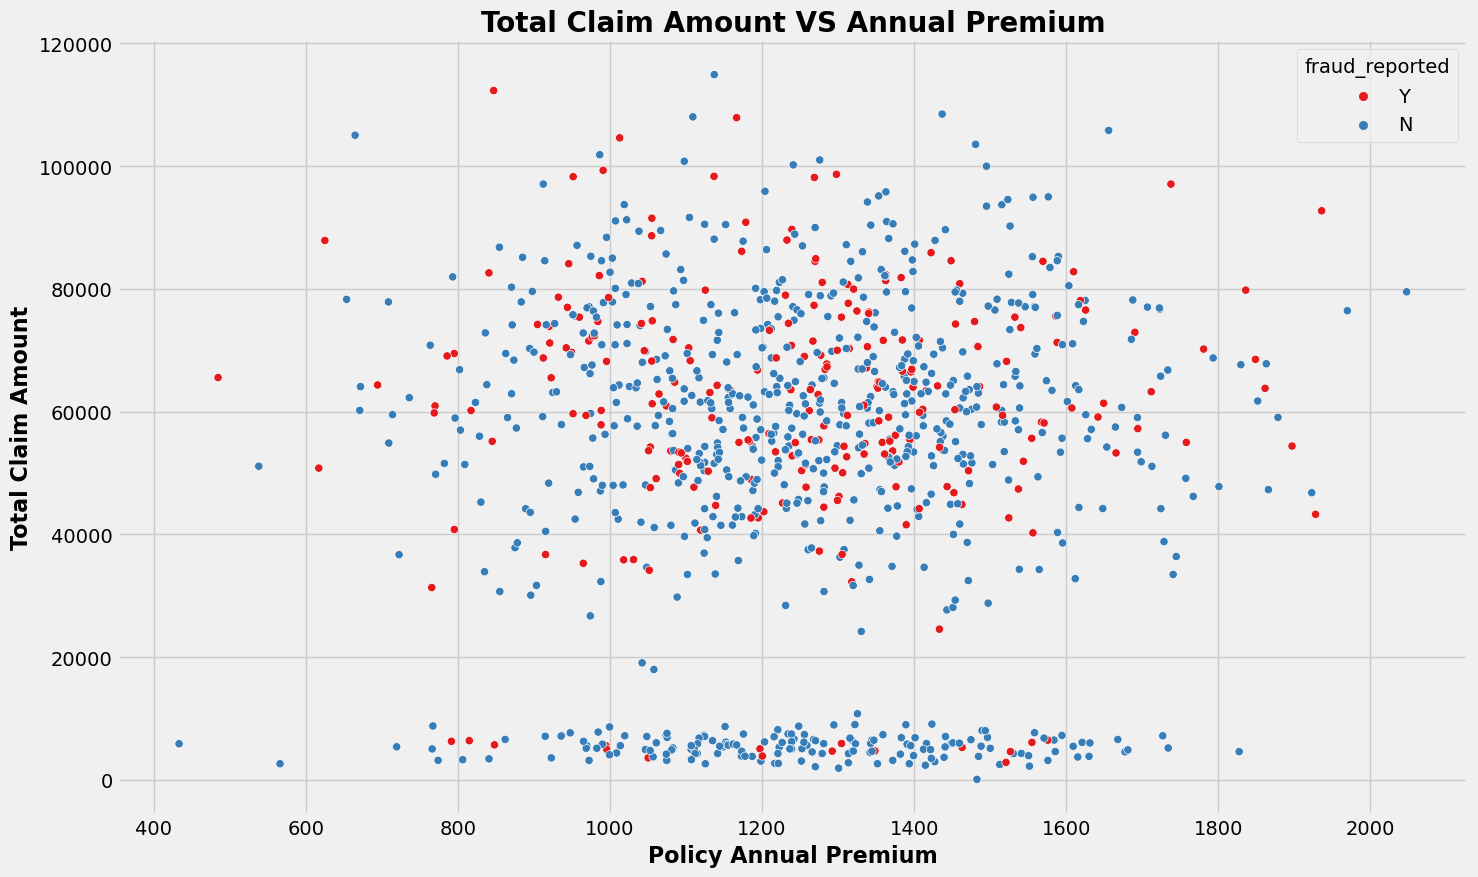

In [66]:
# swarm plot
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,9)
sns.scatterplot(x=df['policy_annual_premium'], y=df['total_claim_amount'], hue=df.fraud_reported, palette = 'Set1')
plt.title('Total Claim Amount VS Annual Premium',fontsize=20,fontweight ='bold')
plt.xlabel('Policy Annual Premium', fontsize=16,fontweight='bold')
plt.ylabel('Total Claim Amount', fontsize=16,fontweight='bold')
plt.show()

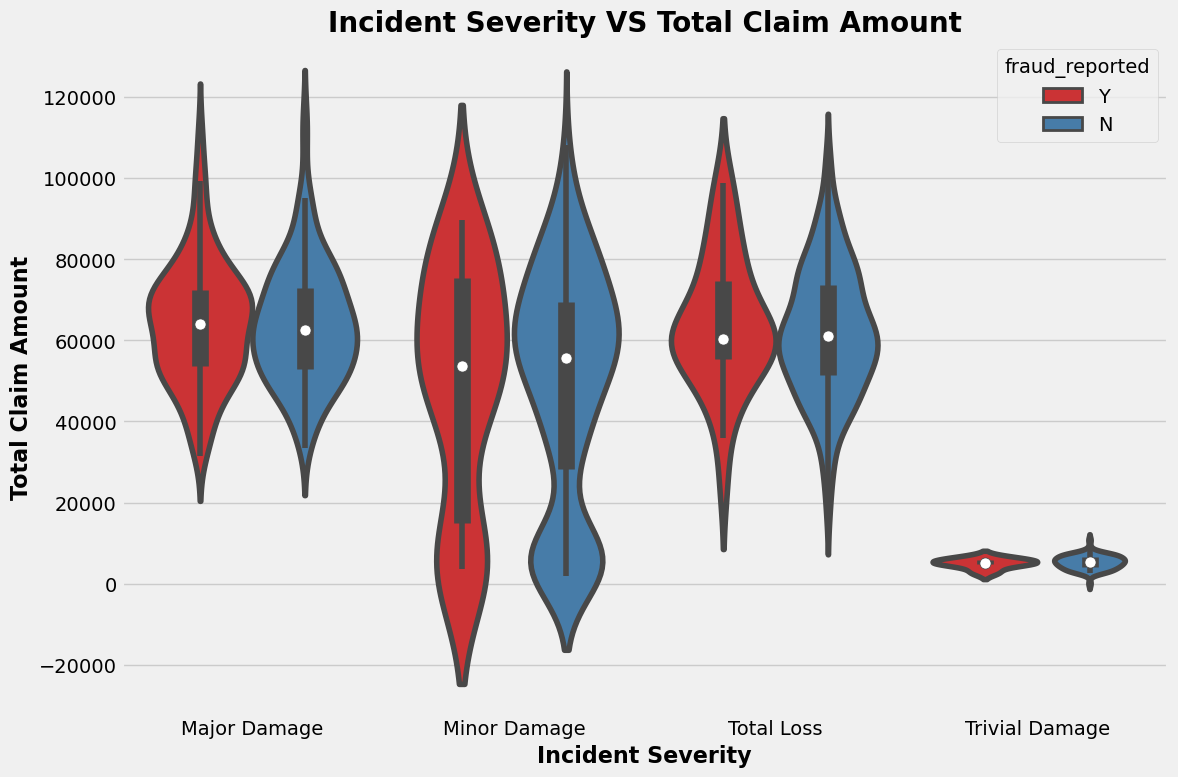

In [67]:
# swarm plot
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,8)
sns.violinplot(x=df['incident_severity'], y=df['total_claim_amount'], hue=df.fraud_reported, palette = 'Set1')
plt.title('Incident Severity VS Total Claim Amount',fontsize=20,fontweight ='bold')
plt.xlabel('Incident Severity', fontsize=16,fontweight='bold')
plt.ylabel('Total Claim Amount', fontsize=16,fontweight='bold')
plt.show()

In [68]:
pd.set_option('display.max_columns', None) # This will enable us to see truncated columns
df.head()

months_as_customer  age policy_state  policy_deductable  \
0                 328   48           OH               1000   
1                 228   42           IN               2000   
2                 134   29           OH               2000   
3                 256   41           IL               2000   
4                 228   44           IL               1000   

   policy_annual_premium  umbrella_limit insured_sex insured_education_level  \
0                1406.91               0        MALE                      MD   
1                1197.22         5000000        MALE                      MD   
2                1413.14         5000000      FEMALE                     PhD   
3                1415.74         6000000      FEMALE                     PhD   
4                1583.91         6000000        MALE               Associate   

  insured_occupation insured_hobbies insured_relationship  capital-gains  \
0       craft-repair        sleeping              husband          53300   
1  machine-op-inspct         reading       other-relative              0   
2              sales     board-games            own-child          35100   
3       armed-forces     board-games            unmarried          48900   
4              sales     board-games            unmarried          66000   

   capital-loss             incident_type   collision_type incident_severity  \
0             0  Single Vehicle Collision   Side Collision      Major Damage   
1             0             Vehicle Theft   Rear Collision      Minor Damage   
2             0   Multi-vehicle Collision   Rear Collision      Minor Damage   
3        -62400  Single Vehicle Collision  Front Collision      Major Damage   
4        -46000             Vehicle Theft   Rear Collision      Minor Damage   

  authorities_contacted incident_state incident_city  \
0                Police             SC      Columbus   
1                Police             VA     Riverwood   
2                Police             NY      Columbus   
3                Police             OH     Arlington   
4                Police             NY     Arlington   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1              NO   
2                         7                            3              NO   
3                         5                            1              NO   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                      NO                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             650           4550     Accura        RSX   

  fraud_reported CSL_Personal CSL_Accidental  policy_bind_day  \
0              Y          250            500               17   
1              Y          250            500               27   
2              N          100            300                6   
3              Y          250            500               25   
4              N          500           1000                6   

   policy_bind_month  policy_bind_year  incident_day  incident_month  \
0                 10              2014            25      

# Encoding categorical data

In [69]:
Category = ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation',
            'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
            'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 
            'auto_make', 'auto_model', 'fraud_reported', 'CSL_Personal', 'CSL_Accidental']

In [70]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

months_as_customer  age  policy_state  policy_deductable  \
0                 328   48             2               1000   
1                 228   42             1               2000   
2                 134   29             2               2000   
3                 256   41             0               2000   
4                 228   44             0               1000   

   policy_annual_premium  umbrella_limit  insured_sex  \
0                1406.91               0            1   
1                1197.22         5000000            1   
2                1413.14         5000000            0   
3                1415.74         6000000            0   
4                1583.91         6000000            1   

   insured_education_level  insured_occupation  insured_hobbies  \
0                        4                   2               17   
1                        4                   6               15   
2                        6                  11                2   
3                        6                   1                2   
4                        0                  11                2   

   insured_relationship  capital-gains  capital-loss  incident_type  \
0                     0          53300             0              2   
1                     2              0             0              3   
2                     3          35100             0              0   
3                     4          48900        -62400              2   
4                     4          66000        -46000              3   

   collision_type  incident_severity  authorities_contacted  incident_state  \
0               2                  0                      3               4   
1               1                  1                      3               5   
2               1                  1                      3               1   
3               0                  0                      3               2   
4               1                  1                      3               1   

   incident_city  incident_hour_of_the_day  number_of_vehicles_involved  \
0              1                         5                            1   
1              5                         8                            1   
2              1                         7                            3   
3              0                         5                            1   
4              0                        20                            1   

   property_damage  bodily_injuries  witnesses  police_report_available  \
0                1                1          2                        1   
1                0                0          0                        0   
2                0                2          3                        0   
3                0                1          2                        0   
4                0                0          1                        0   

   total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make  \
0               71610          6510           13020          52080         10   
1                5070           780             780           3510          8   
2               34650          7700            3850          23100          4   
3               63400          6340            6340          50720          3   
4                6500          1300             650           4550          0   

   auto_model  fraud_reported  CSL_Personal  CSL_Accidental  policy_bind_day  \
0           1               1             1               2               17   
1          12               1             1               2               27   
2          30               0             0               1                6   
3          34               1             1               2               25   
4          31               0             2               0                6   

   policy_bind_month  policy_bind_year  incident_day  incident_month  \
0                 10              

# Feature selection and Engineering

# 1. Outliers Detection and Removal

In [72]:
Numerical = ['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss',
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 
             'total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim', 'policy_bind_day', 
             'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month', 'Automobile_Age','policy_annual_premium']

In [73]:
len(Numerical)

21

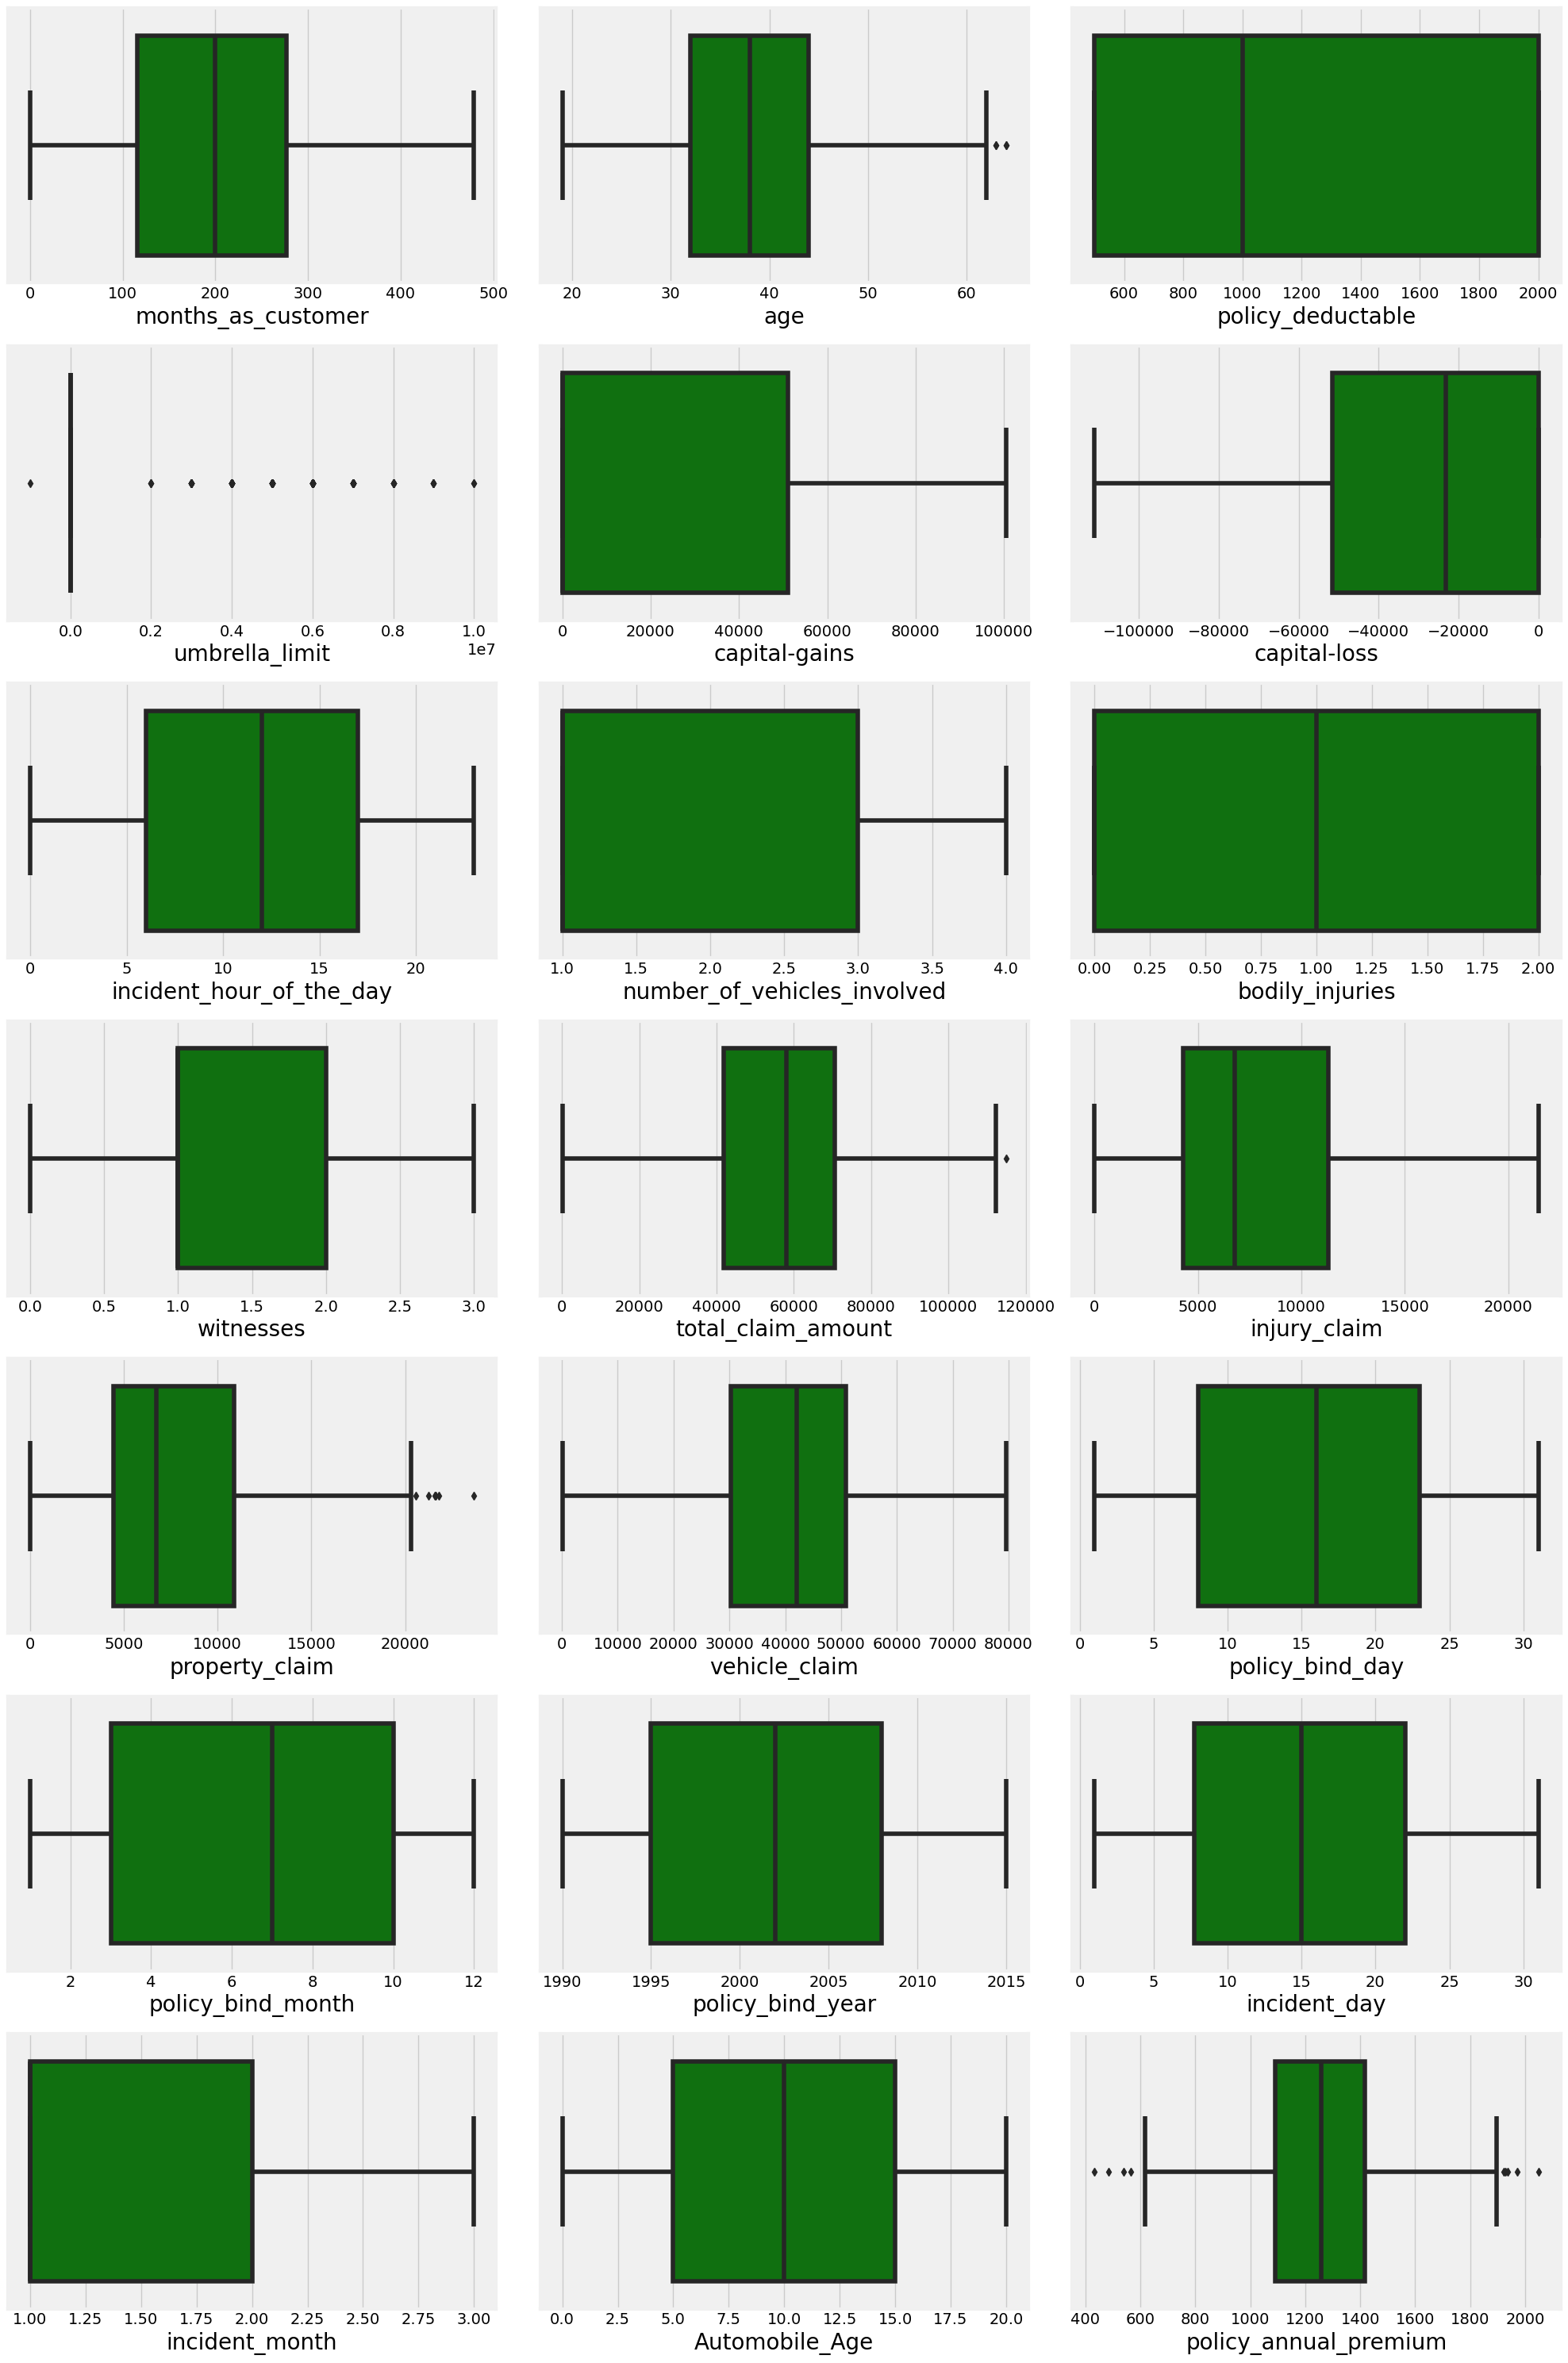

In [75]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=21:
        ax=plt.subplot(7,3,plotnumber)
        sns.boxplot(x=df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

**From Boxplot we can see outliers exist dataset.**

**Outliers removal using Zscore method**

In [79]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['age_bins'])
label

array([3, 3, 1, 3, 3, 2, 2, 2, 2, 3, 3, 5, 1, 2, 2, 4, 1, 2, 2, 2, 5, 3,
       4, 4, 2, 2, 3, 2, 2, 3, 1, 2, 2, 1, 2, 2, 1, 3, 4, 2, 1, 2, 1, 1,
       3, 2, 2, 3, 2, 2, 4, 1, 2, 2, 2, 1, 4, 2, 2, 2, 2, 3, 2, 3, 3, 2,
       2, 5, 1, 3, 3, 3, 3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 1, 2, 3, 3, 2, 2,
       2, 1, 1, 1, 3, 3, 3, 1, 3, 1, 3, 3, 3, 1, 3, 2, 4, 3, 5, 1, 3, 2,
       3, 4, 3, 2, 4, 3, 2, 3, 2, 2, 3, 2, 2, 1, 2, 2, 2, 2, 3, 1, 3, 2,
       1, 2, 2, 2, 2, 1, 3, 2, 2, 3, 2, 1, 2, 4, 3, 2, 1, 3, 2, 3, 2, 4,
       2, 3, 5, 4, 2, 1, 2, 3, 3, 1, 2, 1, 1, 3, 3, 2, 3, 1, 1, 2, 3, 3,
       2, 3, 2, 2, 2, 4, 1, 1, 3, 2, 2, 2, 1, 1, 4, 2, 3, 2, 1, 3, 2, 3,
       3, 3, 2, 3, 2, 5, 2, 3, 2, 1, 3, 4, 1, 2, 3, 2, 2, 3, 1, 1, 3, 3,
       3, 3, 3, 3, 2, 3, 4, 4, 4, 2, 2, 3, 3, 2, 1, 4, 2, 1, 3, 2, 3, 2,
       2, 2, 1, 4, 1, 3, 1, 1, 1, 1, 2, 5, 1, 4, 2, 3, 2, 1, 1, 2, 3, 2,
       1, 4, 3, 1, 2, 2, 4, 2, 3, 1, 2, 3, 3, 3, 2, 2, 2, 2, 2, 4, 2, 2,
       2, 2, 1, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 1, 3,

In [81]:
df.drop("age_bins", axis=1, inplace=True)

In [83]:
df["age_bins"] = label

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   int32  
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_sex                  1000 non-null   int32  
 7   insured_education_level      1000 non-null   int32  
 8   insured_occupation           1000 non-null   int32  
 9   insured_hobbies              1000 non-null   int32  
 10  insured_relationship         1000 non-null   int32  
 11  capital-gains                1000 non-null   int64  
 12  capital-loss                 1000 non-null   int64  
 13  incident_type      

In [85]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (1000, 41)
Shape of the dataframe after removing outliers:  (980, 41)
Percentage of data loss post outlier removal:  2.0


# 2. Skewness of features

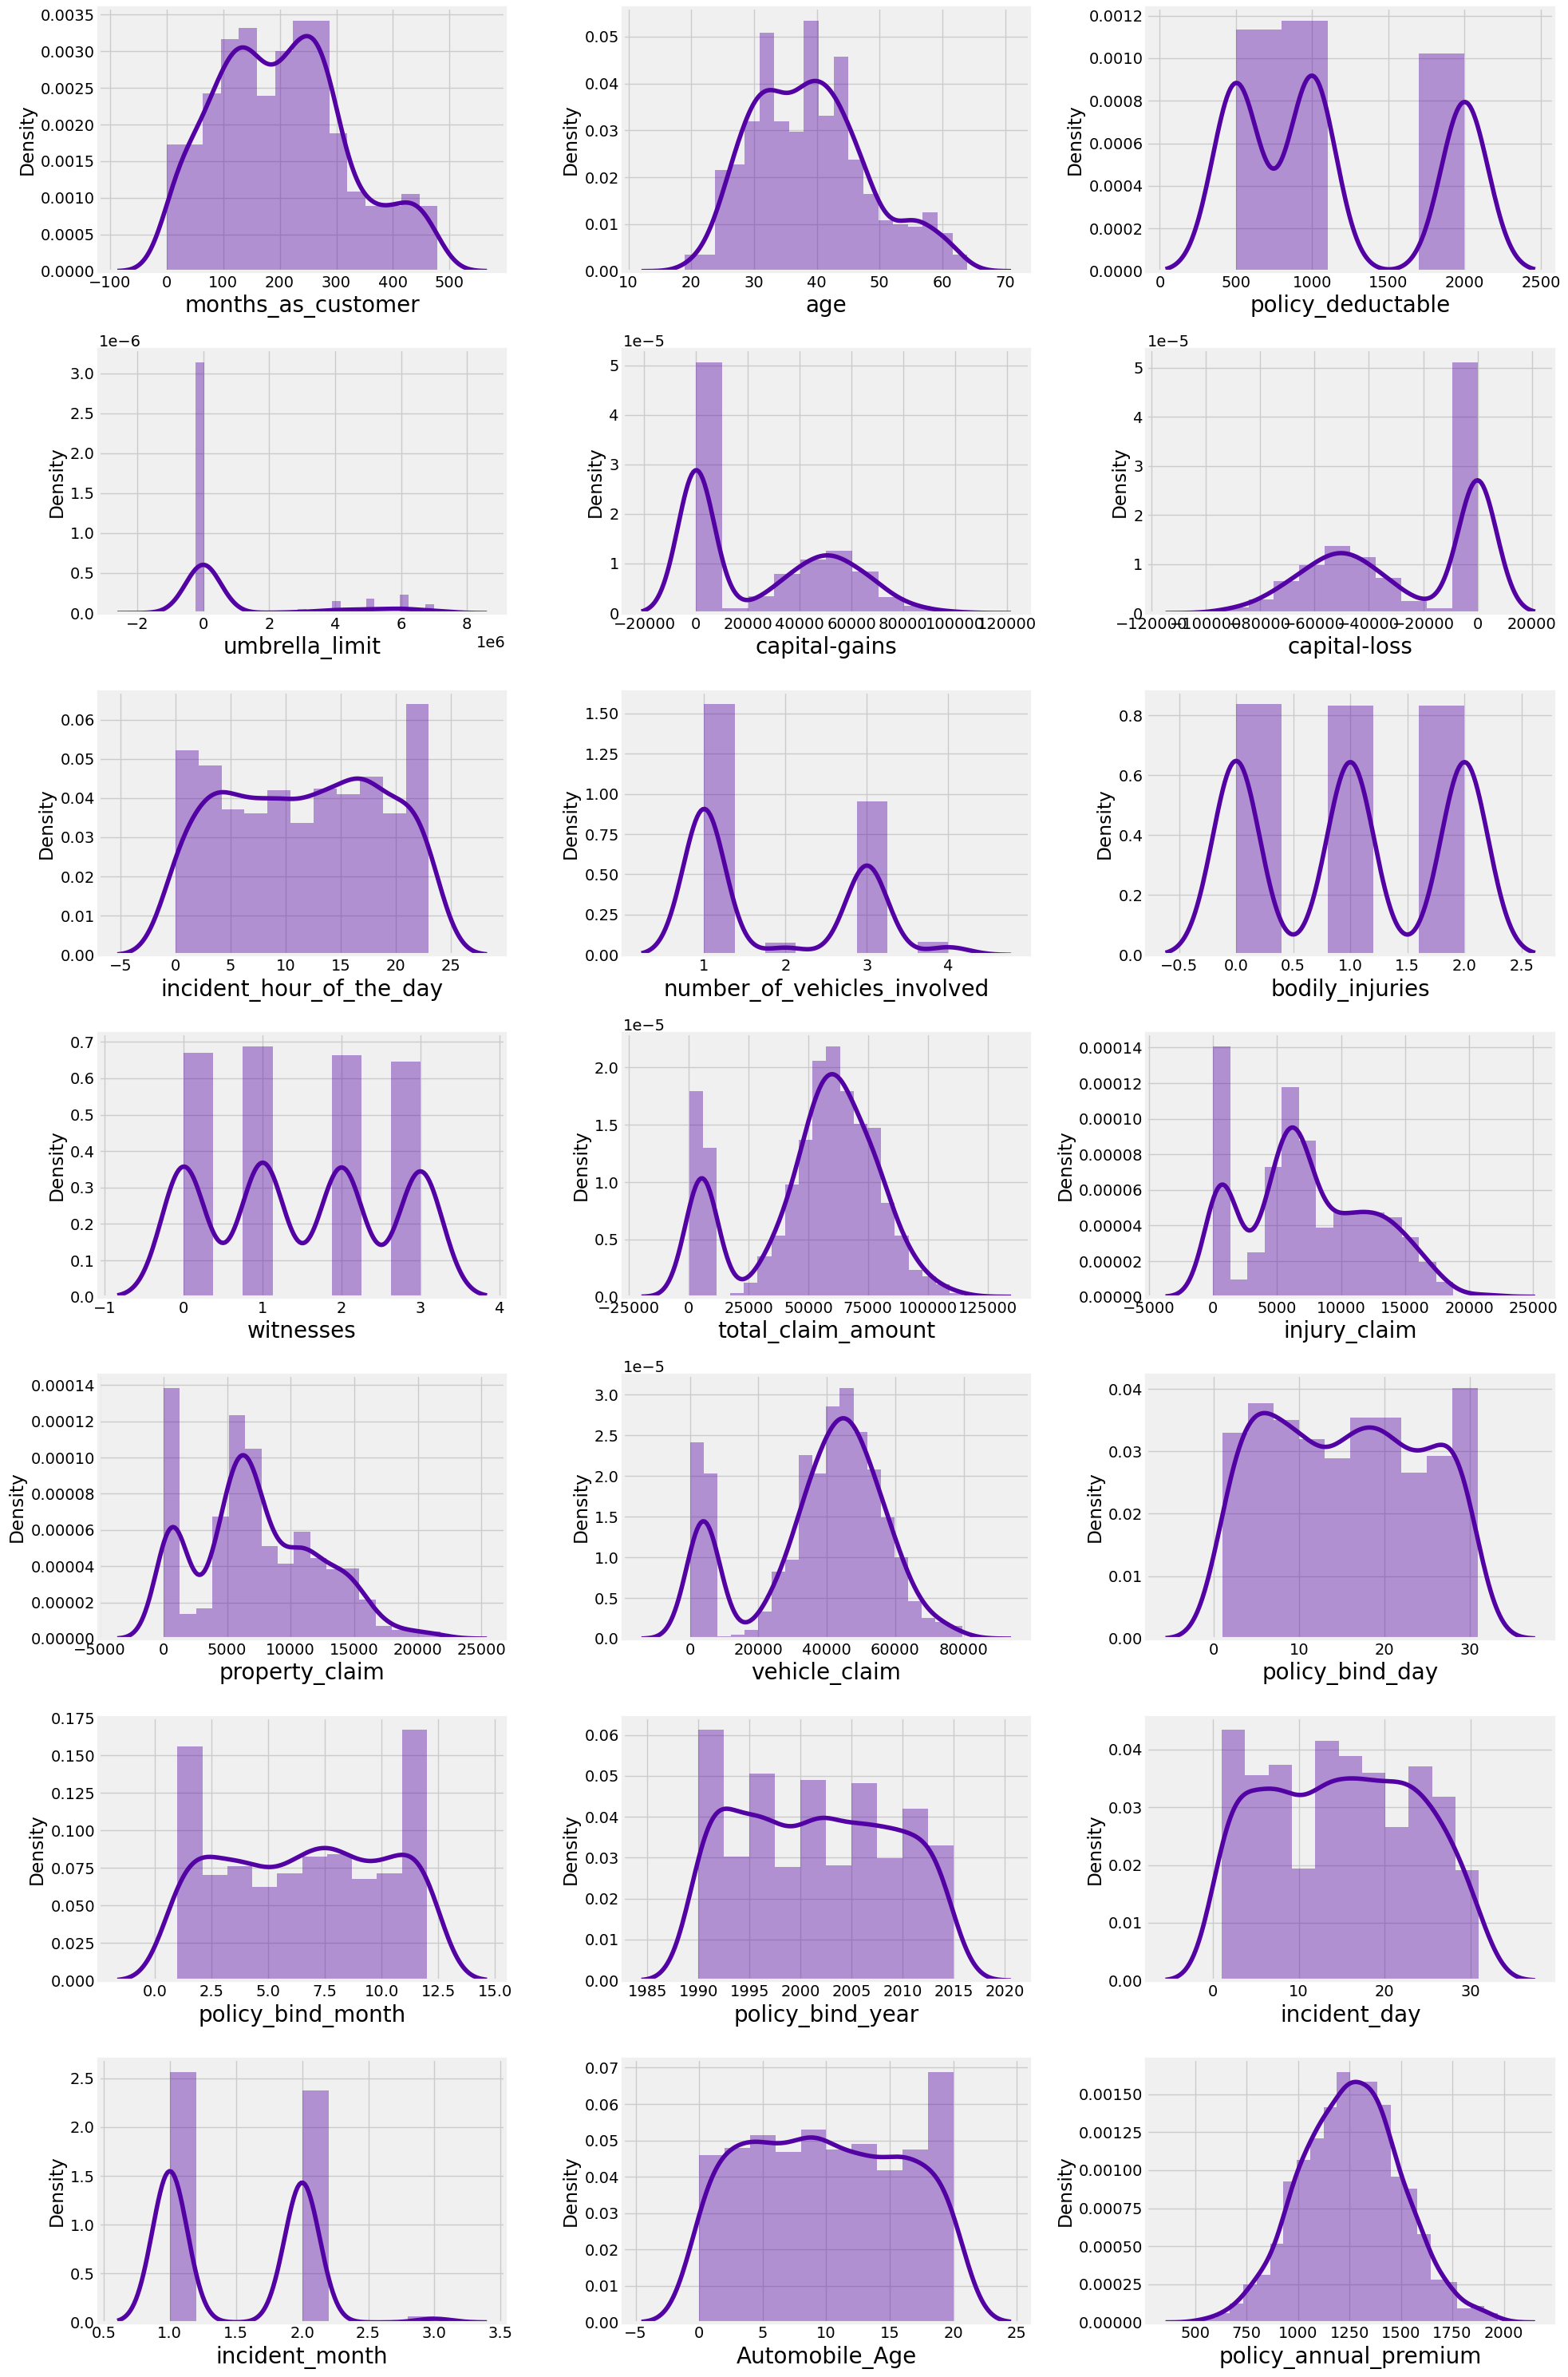

In [86]:
plt.figure(figsize=(20,30),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in Numerical:
    if plotnum<=21:
        plt.subplot(7,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

- Skewness isimportant feature for continuous data. There is no relevence of skewness for discrete numerical feature like month and categorical feature. So we gone ignore skewness present in discrete numerical and categorical feature.

- We also going to ignore skewness in target feature

In [87]:
df[Numerical].skew()

months_as_customer             0.362608
age                            0.475385
policy_deductable              0.476090
umbrella_limit                 1.801424
capital-gains                  0.466619
capital-loss                  -0.376884
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725
bodily_injuries                0.003757
witnesses                      0.026211
total_claim_amount            -0.593593
injury_claim                   0.271759
property_claim                 0.361356
vehicle_claim                 -0.620936
policy_bind_day                0.054173
policy_bind_month             -0.029021
policy_bind_year               0.065022
incident_day                   0.037814
incident_month                 0.259907
Automobile_Age                 0.054522
policy_annual_premium          0.035964
dtype: float64

- Out above features 'umbrella_limit', 'total_claim_amount' and 'vehicle_claim' are continous variable with skew data. The variable 'incident_month' is skewed but it is discrete in nature. So ignore it.
- We will use yeo-johnson method to tranform negatively skewed data.

In [88]:
# Making the skew less than or equal to +0.5 and -0.5 for better prediction using yeo-johnson method
skew=['total_claim_amount','vehicle_claim']

# Importing Powertransformer
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

# Transfroming skew data
df[skew] = scaler.fit_transform(df[skew].values)

**Checking Skewness after tranformation**

In [89]:
df[skew].skew()

total_claim_amount   -0.508540
vehicle_claim        -0.521805
dtype: float64

**For 'total_claim_amount', 'vehicle_claim' skewness has not been removed but it got reduced**

# 3. Corrleation

In [90]:
df.corr()

months_as_customer       age  policy_state  \
months_as_customer                     1.000000  0.922960     -0.007183   
age                                    0.922960  1.000000     -0.020012   
policy_state                          -0.007183 -0.020012      1.000000   
policy_deductable                      0.031041  0.032036      0.017612   
policy_annual_premium                 -0.003814  0.005330      0.015089   
umbrella_limit                         0.018213  0.013256     -0.010921   
insured_sex                            0.059644  0.073790     -0.018002   
insured_education_level               -0.000731  0.001647     -0.027173   
insured_occupation                     0.006925  0.014798     -0.025357   
insured_hobbies                       -0.089358 -0.079099     -0.039501   
insured_relationship                   0.071492  0.076129     -0.017060   
capital-gains                          0.007468 -0.004529      0.068619   
capital-loss                           0.023041  0.012860     -0.031926   
incident_type                         -0.016746 -0.026286      0.032373   
collision_type                        -0.073031 -0.076325      0.049961   
incident_severity                     -0.064094 -0.064396     -0.028353   
authorities_contacted                  0.008124  0.009986     -0.004596   
incident_state                         0.015811  0.012644      0.019456   
incident_city                         -0.006601 -0.006685     -0.002809   
incident_hour_of_the_day               0.066198  0.083720      0.021926   
number_of_vehicles_involved            0.011831  0.020391     -0.045514   
property_damage                       -0.000630 -0.008239     -0.013576   
bodily_injuries                       -0.007674 -0.012254      0.012097   
witnesses                              0.063574  0.056360      0.025838   
police_report_available               -0.017200 -0.018135      0.065316   
total_claim_amount                     0.059338  0.068448     -0.015056   
injury_claim                           0.065062  0.077149     -0.048188   
property_claim                         0.036660  0.062375     -0.006420   
vehicle_claim                          0.056360  0.059129     -0.006411   
auto_make                              0.049734  0.033757      0.010259   
auto_model                             0.005130  0.015322     -0.018008   
fraud_reported                         0.021285  0.013279      0.034587   
CSL_Personal                          -0.021855 -0.013323      0.001653   
CSL_Accidental                         0.007121  0.011258      0.029007   
policy_bind_day                        0.055263  0.057361      0.011512   
policy_bind_month                     -0.007080  0.003470      0.041076   
policy_bind_year                      -0.041914 -0.031709     -0.003045   
incident_day                          -0.002511  0.002183      0.028847   
incident_month                        -0.048064 -0.038622      0.016468   
Automobile_Age                        -0.000869 -0.005594      0.001160   
age_bins                               0.879852  0.953728     -0.025330   

                             policy_deductable  policy_annual_premium  \
months_as_customer                    0.031041              -0.003814   
age                                   0.032036               0.005330   
policy_state                          0.017612               0.015089   
policy_deductable                     1.000000              -0.008300   
policy_annual_premium                -0.008300               1.000000   
umbrella_limit                        0.013471              -0.014107   
insured_sex                          -0.006977               0.041312   
insured_education_level               0.014101              -0.021400   
insured_occupation                   -0.053888               0.027827   
insured_hobbies                      -0.001923              -0.014226   
insured_relationship                 -0.019000               0.004417   
ca

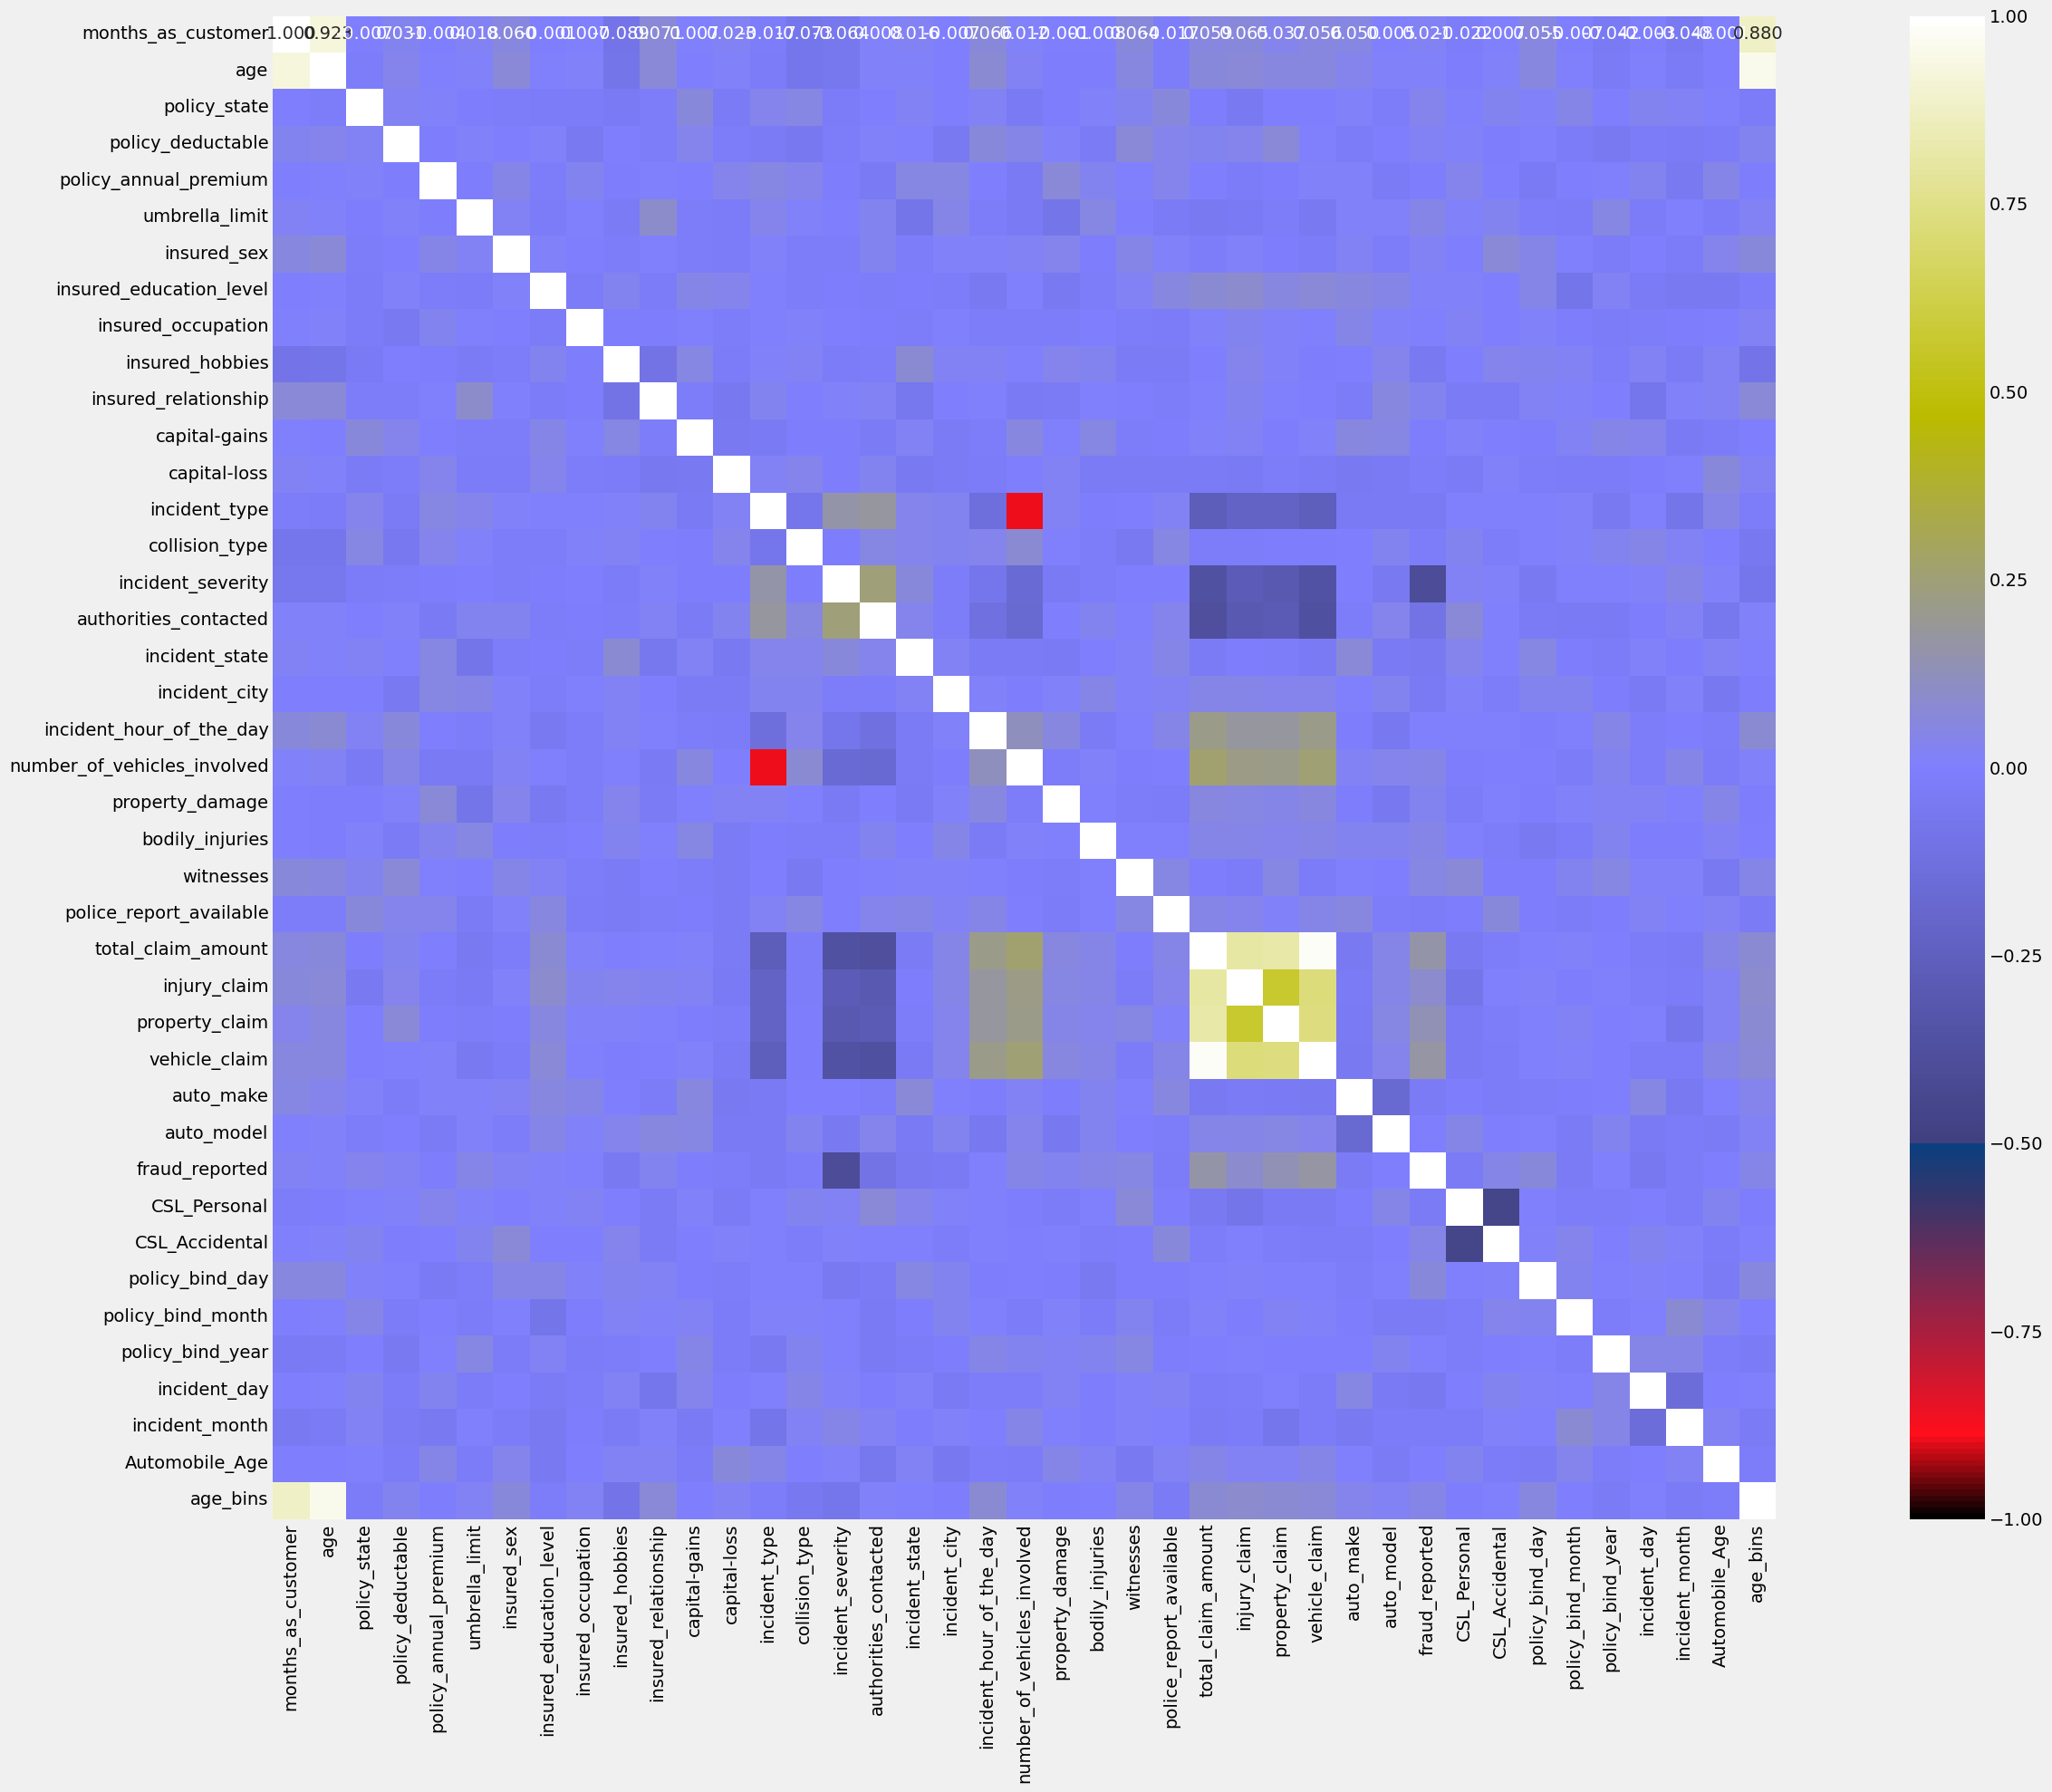

In [91]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', cmap="gist_stern")
plt.show()

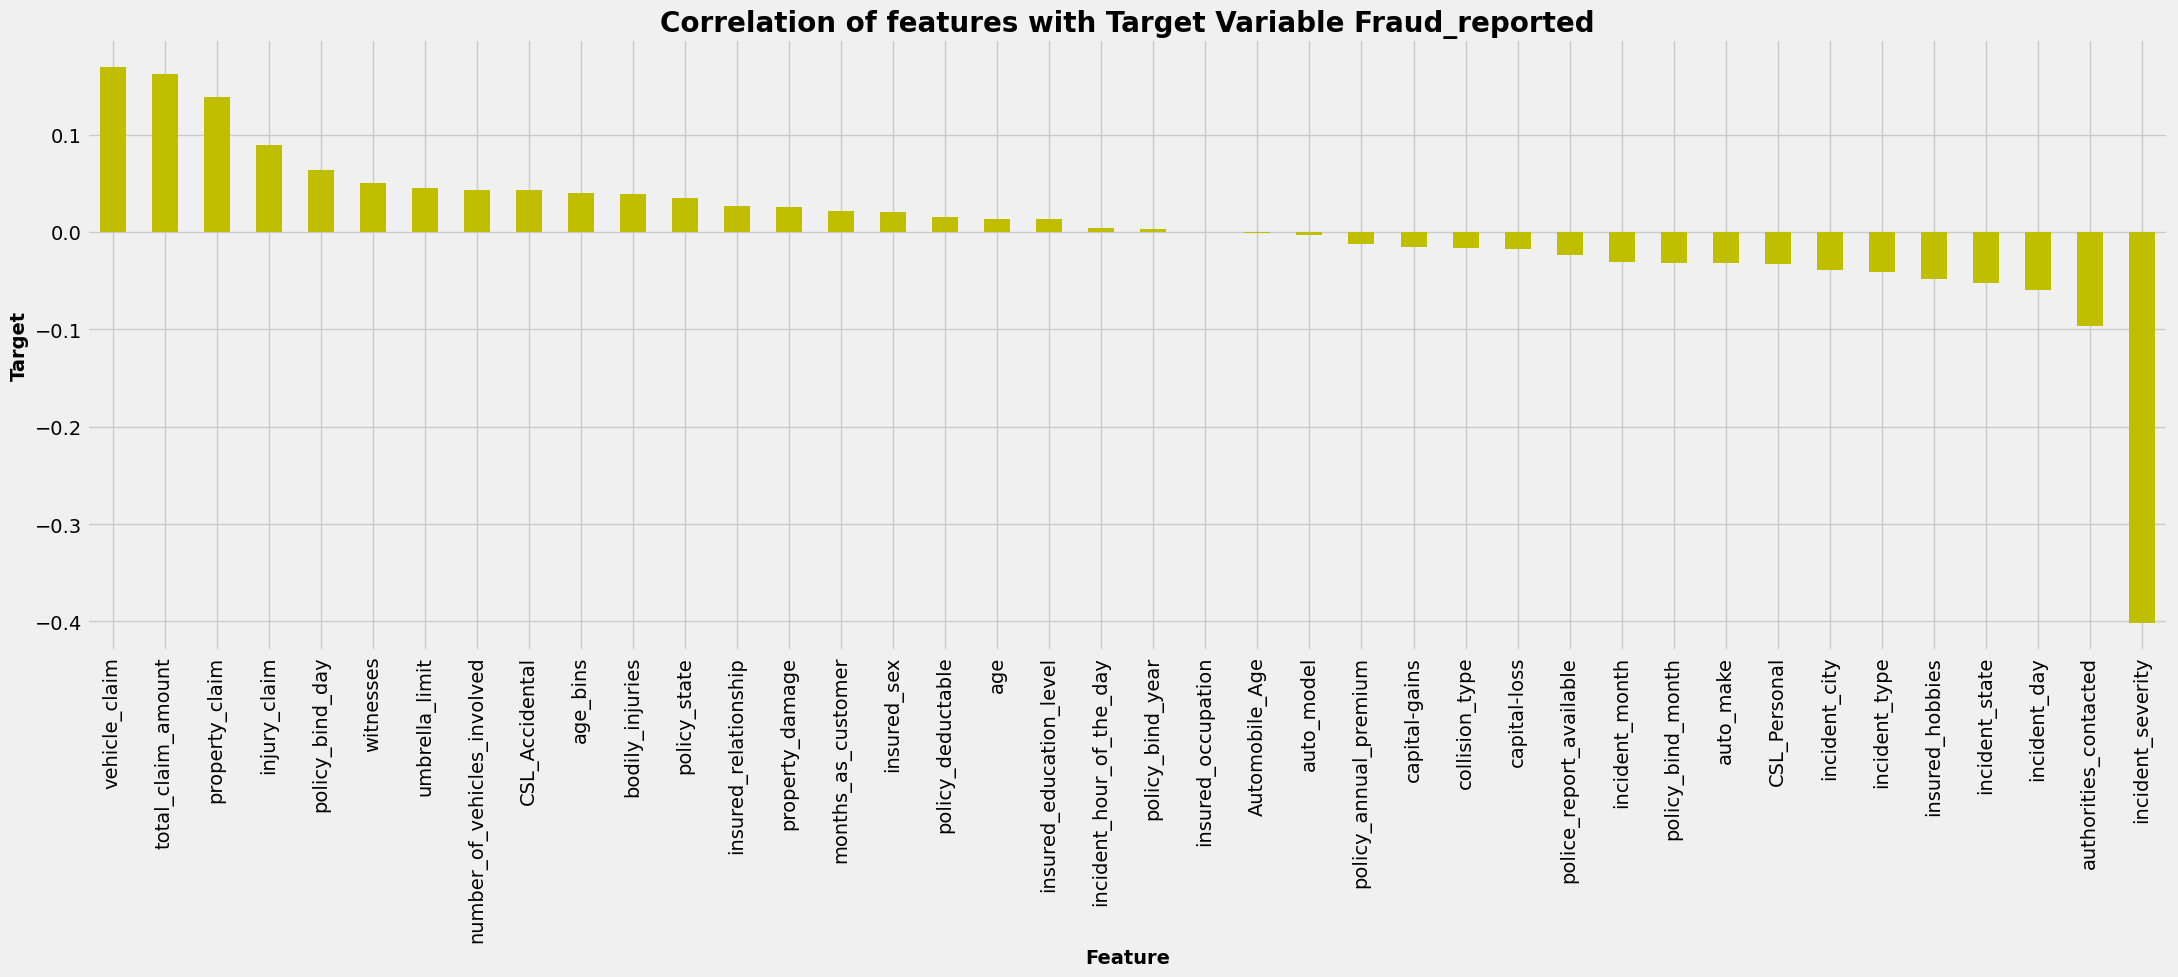

In [92]:
plt.figure(figsize=(22,10))
df.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar',color='y')
plt.xlabel('Feature',fontsize=14,fontweight='bold')
plt.ylabel('Target',fontsize=14,fontweight='bold')
plt.title('Correlation of features with Target Variable Fraud_reported',fontsize=20,fontweight='bold')
plt.show()

- incident_severity is correlated with target variable with correlation of 0.4. Other variable are poorly correlated with target variable.
- Other variable are poorly correlated with target variable.
- injury_claim,property_claim,vehicle_claim are highly correlated with each other.
- incident_hour_of_the_day is highly negative correlated with incident type

# 4. Balancing Imbalanced target feature

In [93]:
df.fraud_reported.value_counts()

fraud_reported
0    740
1    240
Name: count, dtype: int64

**As target variable data is imbalanced in nature we will need to balance target variable.**

# Balancing using SMOTE

In [94]:
from imblearn.over_sampling import SMOTE

In [95]:
# Splitting data in target and dependent feature
X = df.drop(['fraud_reported'], axis =1)
Y = df['fraud_reported']

In [96]:
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [97]:
Y.value_counts()

fraud_reported
1    740
0    740
Name: count, dtype: int64

- We have successfully resolved the class imbalanced problem and now all the categories have same data ensuring that the ML model does not get biased towards one category.

# Standard Scaling

In [98]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

# 5. Checking Multicollinearity between features using variance_inflation_factor

In [99]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

VIF values                     Features
0       7.890575           months_as_customer
1      14.295448                          age
2       1.054685                 policy_state
3       1.062823            policy_deductable
4       1.046169        policy_annual_premium
5       1.051270               umbrella_limit
6       1.089331                  insured_sex
7       1.058642      insured_education_level
8       1.033654           insured_occupation
9       1.076480              insured_hobbies
10      1.068926         insured_relationship
11      1.059102                capital-gains
12      1.058991                 capital-loss
13      3.727879                incident_type
14      1.104469               collision_type
15      1.394386            incident_severity
16      1.356571        authorities_contacted
17      1.071976               incident_state
18      1.061290                incident_city
19      1.127805     incident_hour_of_the_day
20      3.535611  number_of_vehicles_involved
21      1.061458              property_damage
22      1.052407              bodily_injuries
23      1.075412                    witnesses
24      1.110489      police_report_available
25  43778.047741           total_claim_amount
26   1721.651109                 injury_claim
27   1686.093479               property_claim
28  21892.307669                vehicle_claim
29      1.082941                    auto_make
30      1.082446                   auto_model
31      1.251853                 CSL_Personal
32      1.201799               CSL_Accidental
33      1.037170              policy_bind_day
34      1.044810            policy_bind_month
35      1.043932             policy_bind_year
36      1.079337                 incident_day
37      1.124476               incident_month
38      1.060229               Automobile_Age
39      7.324779                     age_bins

**Strategy to Address Multicollinearity:**
1. Removing Some of highly correlated features. But this will not work here as most of input features are correlated with each other either moderated or poorly.
2. Another way to address Multicollinearity is to Scaled Data and then apply PCA.

**We will go by Second way for further investigation. As For some independent feature VIF is exceed permissible limit of 10.**

# PCA

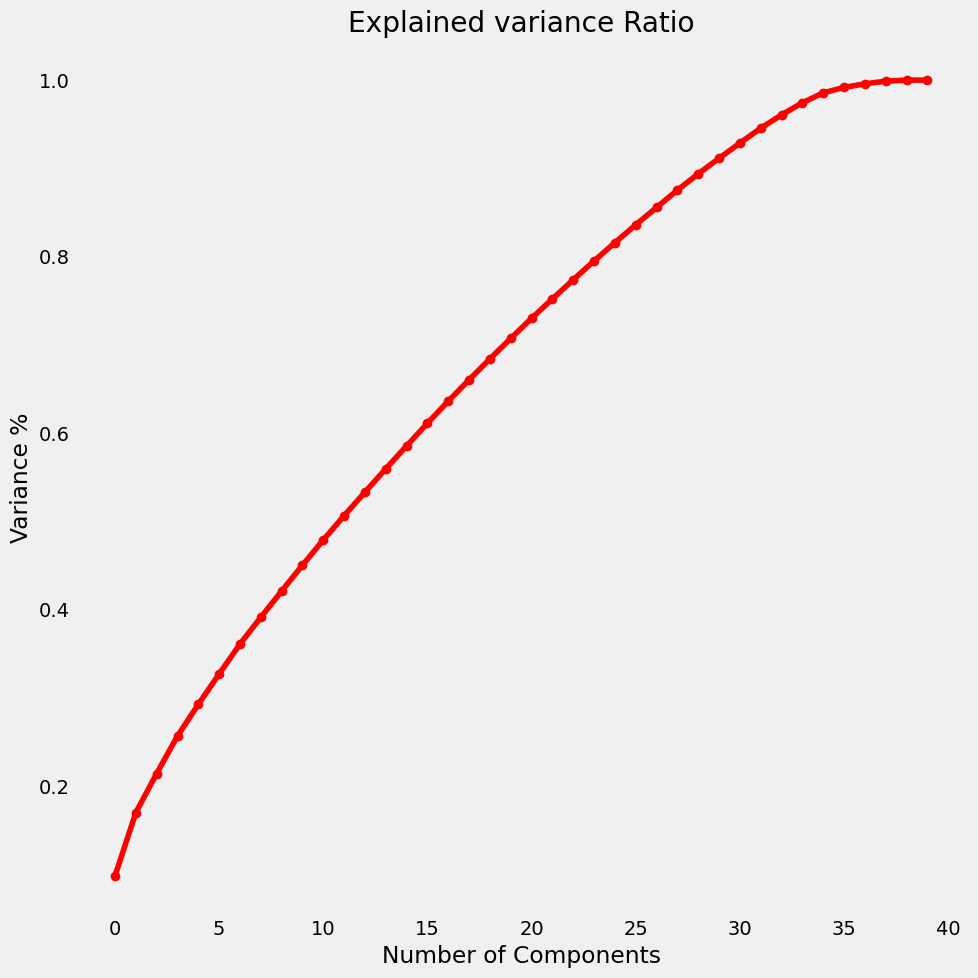

In [100]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

**Comment:**

- As per the graph, we can see that 28 principal compponents attribute for 90% of variation in the data. We shall pick the first 28 components for our prediction. 

In [101]:
pca_new = PCA(n_components=28)
x_new = pca_new.fit_transform(X_scale)

In [102]:
principle_x=pd.DataFrame(x_new,columns=np.arange(28))

# Machine Learning Model Building

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [104]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (1036, 28)
Training target vector size: (1036,)
Test feature matrix size: (444, 28)
Test target vector size: (444,)


In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(principle_x,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8243243243243243 on Random_state 187


In [107]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=187, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation
Accuracy Score of Logistics Regression : 0.8243243243243243
Confusion matrix of Logistics Regression : 
 [[177  31]
 [ 47 189]]
classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       208
           1       0.86      0.80      0.83       236

    accuracy                           0.82       444
   macro avg       0.82      0.83      0.82       444
weighted avg       0.83      0.82      0.82       444



In [108]:
# Finding optimal value of n_neighbors for KNN
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.4375402169417589
RMSE value for k=  2 is: 0.42712109808862453
RMSE value for k=  3 is: 0.47694599010525024
RMSE value for k=  4 is: 0.4426578203826811
RMSE value for k=  5 is: 0.4793012932694108
RMSE value for k=  6 is: 0.4625623892665334
RMSE value for k=  7 is: 0.4931969619160719
RMSE value for k=  8 is: 0.4674061065802077
RMSE value for k=  9 is: 0.5022472023339226
RMSE value for k=  10 is: 0.469809238649817
RMSE value for k=  11 is: 0.4909083325744135
RMSE value for k=  12 is: 0.48164507885161867
RMSE value for k=  13 is: 0.5022472023339226
RMSE value for k=  14 is: 0.4793012932694108
RMSE value for k=  15 is: 0.5067117097095317
RMSE value for k=  16 is: 0.504484394708602
RMSE value for k=  17 is: 0.5089292770208932
RMSE value for k=  18 is: 0.49547502005196536
RMSE value for k=  19 is: 0.5198752449100363
RMSE value for k=  20 is: 0.4909083325744135


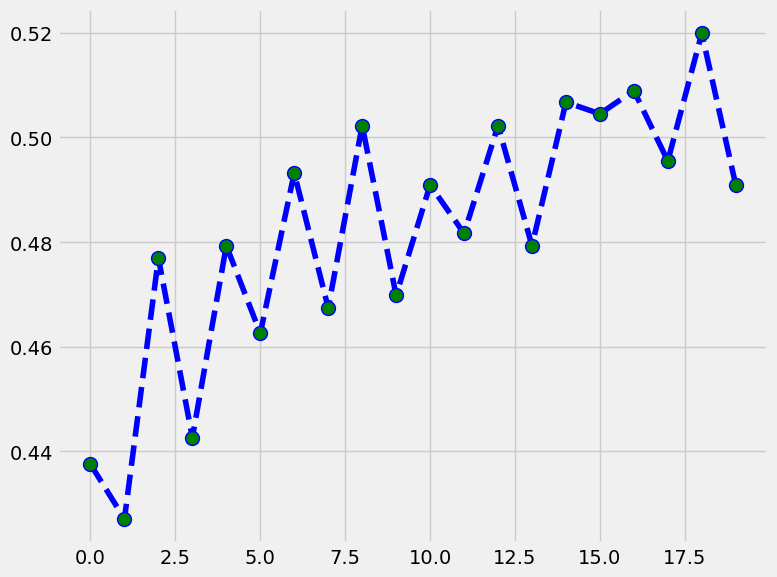

In [109]:
#plotting the rmse values against k values -
plt.figure(figsize = (8,6))
plt.plot(range(20), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

- At k=2, we get minimum RMSE value which approximately 0.42712109808862453, and shoots up on further increasing the k value. we can safely say that k=2 will give us the best result in this case.

# Applying other classification algorithm.

In [111]:
model=[ LogisticRegression(),
        SVC(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    print('==================================================')

Classification ML Algorithm Evaluation Matrix LogisticRegression() is
Accuracy Score :
 0.8243243243243243
Confusion matrix : 
 [[177  31]
 [ 47 189]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       208
           1       0.86      0.80      0.83       236

    accuracy                           0.82       444
   macro avg       0.82      0.83      0.82       444
weighted avg       0.83      0.82      0.82       444



Classification ML Algorithm Evaluation Matrix SVC() is
Accuracy Score :
 0.8378378378378378
Confusion matrix : 
 [[189  19]
 [ 53 183]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       208
           1       0.91      0.78      0.84       236

    accuracy                           0.84       444
   macro avg       0.84      0.84      0.84       444
weighted avg       0.85      0.84      0.84       444



Cla

# Cross Validation:

In [112]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, principle_x, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('==========================================================')



Cross Validation Score LogisticRegression() :

Score : [0.61148649 0.69594595 0.8277027  0.84121622 0.87162162]
Mean Score : 0.7695945945945946
Std deviation : 0.0993358147426046




Cross Validation Score SVC() :

Score : [0.5777027  0.75       0.89189189 0.89864865 0.9222973 ]
Mean Score : 0.8081081081081081
Std deviation : 0.130168879462119




Cross Validation Score DecisionTreeClassifier() :

Score : [0.54054054 0.61486486 0.73648649 0.79054054 0.75      ]
Mean Score : 0.6864864864864865
Std deviation : 0.0935853496928691




Cross Validation Score KNeighborsClassifier(n_neighbors=3) :

Score : [0.69256757 0.72635135 0.75675676 0.79054054 0.74662162]
Mean Score : 0.7425675675675675
Std deviation : 0.03250273911028568




Cross Validation Score RandomForestClassifier() :

Score : [0.58783784 0.70608108 0.89527027 0.90540541 0.91554054]
Mean Score : 0.802027027027027
Std deviation : 0.13217363018834663




Cross Validation Score ExtraTreesClassifier() :

Score : [0.62162162 0.7331

# Hyper Parameter Tuning : GridSearchCV

In [113]:
from sklearn.model_selection import GridSearchCV

In [114]:
parameter= {'criterion' : ['gini', 'entropy'],
             'max_features':['auto','sqrt','log2'],
              'min_samples_split':[3,5,8,11],
              'max_depth' : [10,20,30],
              'n_estimators' : [100,200,300,400]
             }

In [115]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameter,verbose=2)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END

[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=300; total time=   0.4s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=300; total time=   0.4s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=300; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=300; total time=   0.4s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=300; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=400; total time=   0.4s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=400; total time=   0.5s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=400; total time=   0.5s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_sa

[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=11, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=11, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=11, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=11, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=11, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=11, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=11, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=11, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_sa

[CV] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=300; total time=   0.5s
[CV] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=300; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=400; total time=   0.5s
[CV] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=400; total time=   0.5s
[CV] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=400; total time=   0.5s
[CV] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=400; total time=   0.6s
[CV] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=400; total time=   0.5s
[CV] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=log2, min_samples_s

[CV] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=300; total time=   0.4s
[CV] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=300; total time=   0.5s
[CV] END criterion=gini, max_depth=20, max_features=auto, min_samples_sp

[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=400; total time=   0.8s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=400; total time=   0.8s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=400; total time=   0.9s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=400; total time=   0.8s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=400; total time=   1.0s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_sp

[CV] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END criterion=gini, max_depth=20, max_features=log2, min_samples_sp

[CV] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=400; total time=   0.7s
[CV] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=400; total time=   0.7s
[CV] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=400; total time=   0.6s
[CV] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=30, max_features=auto, min_samples_sp

[CV] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=300; total time=   0.5s
[CV] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=300; total time=   0.4s
[CV] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=300; total time=   0.4s
[CV] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=300; total time=   0.4s
[CV] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=300; total time=   0.5s
[CV] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=400; total time=   0.7s
[CV] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_sp

[CV] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=400; total time=   0.5s
[CV] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=3, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=3, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=30, max_features=log2, min_samples_s

[CV] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=300; total time=   0.3s
[CV] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=300; total time=   0.3s
[CV] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=300; total time=   0.3s
[CV] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=300; total time=   0.3s
[CV] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=300; total time=   0.3s
[CV] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=400; total time=   0.4s
[CV] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=400; total time=   0.5s
[CV] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=400; total time=   0.5s
[CV] END criterion=gini, max_depth=30, max_features=log2, min_sa

[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=200; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=200; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=200; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=200; total time=   0.2s
[CV] END criterion=entropy, max_depth=10

[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=300; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=300; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=300; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=300; total time=   0.4s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=300; total time=   0.4s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=400; total time=   0.5s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=400; total time=   0.4s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=400; total time=   0.4s
[CV] END criterion=entropy, max_depth=10, max_fe

[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_fe

[CV] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=300; total time=   0.6s
[CV] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=400; total time=   0.6s
[CV] END criterion=entropy, max_depth=20, max_fe

[CV] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=400; total time=   0.6s
[CV] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=400; total time=   0.7s
[CV] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=400; total time=   0.8s
[CV] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=20, max_fe

[CV] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=3, n_estimators=300; total time=   0.4s
[CV] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=3, n_estimators=300; total time=   0.4s
[CV] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=3, n_estimators=300; total time=   0.4s
[CV] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=3, n_estimators=300; total time=   0.4s
[CV] END criterion=entropy, max_depth=20, max_fe

[CV] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=400; total time=   0.5s
[CV] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=400; total time=   0.5s
[CV] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=400; total time=   0.5s
[CV] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=400; total time=   0.5s
[CV] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=400; total time=   0.5s
[CV] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=30, m

[CV] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=11, n_estimators=200; total time=   0.2s
[CV] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=11, n_estimators=200; total time=   0.2s
[CV] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=11, n_estimators=200; total time=   0.2s
[CV] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=11, n_estimators=200; total time=   0.2s
[CV] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=11, n_estimators=200; total time=   0.2s
[CV] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=11, n_estimators=300; total time=   0.4s
[CV] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=11, n_estimators=300; total time=   0.4s
[CV] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=11, n_estimators=300; total time=   0.4s
[CV] END criterion=entropy, max_depth=30

[CV] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=8, n_estimators=300; total time=   0.5s
[CV] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=8, n_estimators=400; total time=   0.7s
[CV] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=8, n_estimators=400; total time=   1.0s
[CV] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=8, n_estimators=400; total time=   0.9s
[CV] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=8, n_estimators=400; total time=   0.6s
[CV] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=8, n_estimators=400; total time=   0.7s
[CV] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=30, max_

[CV] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=200; total time=   0.8s
[CV] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=300; total time=   1.1s
[CV] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=300; total time=   0.8s
[CV] END criterion=entropy, max_depth=30, max_fe

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [3, 5, 8, 11],
                         'n_estimators': [100, 200, 300, 400]},
             verbose=2)

In [117]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'max_features': 'log2',
 'min_samples_split': 3,
 'n_estimators': 300}

# Final Model

In [118]:
Final_mod = ExtraTreesClassifier(criterion='gini',n_estimators= 300, max_depth=30 ,
                                 min_samples_split= 3, max_features= 'log2')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8581081081081081


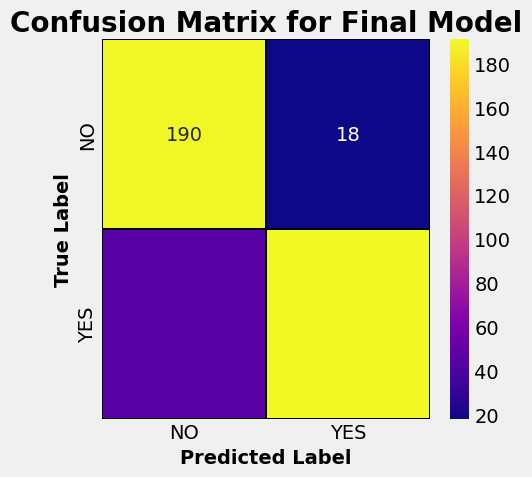

In [120]:
# Lets plot confusion matrix for  FinalModel
Matrix = confusion_matrix(Y_test, y_pred)

x_labels = ["NO","YES"]
y_labels = ["NO","YES"]

fig , ax = plt.subplots(figsize=(5,5))
sns.heatmap(Matrix, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, 
            cmap="plasma", xticklabels = x_labels, yticklabels = y_labels)

plt.xlabel("Predicted Label",fontsize=14,fontweight='bold')
plt.ylabel("True Label",fontsize=14,fontweight='bold')
plt.title('Confusion Matrix for Final Model',fontsize=20,fontweight='bold')
plt.show()

# Saving Model

In [143]:
import joblib
joblib.dump(Final_mod,'Insurance_claims_Final.pkl')

['Insurance_claims_Final.pkl']

# Predicting the final model

In [144]:
# Prediction
prediction = Final_mod.predict(X_test)

In [145]:
Actual = np.array(Y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred.head()

Predicted Values  Actual Values
0                 0              0
1                 0              0
2                 1              1
3                 0              0
4                 1              1